In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv("Hospital_-_Data.csv" ,index_col=0)

In [4]:
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,...,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT,TOTAL COST TO HOSPITAL
SL.,,,,,,,,,,,,,,,,,,,,,
1,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,32,...,0.8,AMBULANCE,ALERT,EMERGENCY,25,12,13,Y,38000,660293.0
2,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,28,...,1.7,AMBULANCE,ALERT,EMERGENCY,41,20,21,Y,39690,809130.0
3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,...,0.8,WALKED IN,ALERT,ELECTIVE,18,9,9,N,0,362231.0
4,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,24,...,1.5,AMBULANCE,ALERT,EMERGENCY,14,13,1,Y,89450,629990.0
5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,...,1.9,AMBULANCE,ALERT,EMERGENCY,24,12,12,N,0,444876.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 1 to 248
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           248 non-null    float64
 1   GENDER                        248 non-null    object 
 2   MARITAL STATUS                248 non-null    object 
 3   KEY COMPLAINTS -CODE          212 non-null    object 
 4   BODY WEIGHT                   248 non-null    float64
 5   BODY HEIGHT                   248 non-null    int64  
 6   HR PULSE                      248 non-null    int64  
 7   BP -HIGH                      225 non-null    float64
 8   BP-LOW                        225 non-null    float64
 9   RR                            248 non-null    int64  
 10  PAST MEDICAL HISTORY CODE     75 non-null     object 
 11  HB                            246 non-null    float64
 12  UREA                          235 non-null    float64
 13  CREAT

Total of 248 entries with 23 columns (15 numeric and 8 Catogorical input variables).
Few columns have null values 

In [6]:
df.columns

Index(['AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT USED (Y/N)', 'COST OF IMPLANT', 'TOTAL COST TO HOSPITAL '],
      dtype='object')

In [7]:
#changing object type into cat 

In [8]:
df2= df.columns.str.replace('[/]', 'or') 

In [9]:
df.columns = df2

In [10]:
df.columns

Index(['AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT USED (YorN)', 'COST OF IMPLANT', 'TOTAL COST TO HOSPITAL '],
      dtype='object')

In [11]:
# set categorical data
df['GENDER'] = df['GENDER'].astype('category')
df['MARITAL STATUS'] = df['MARITAL STATUS'].astype('category')
df['KEY COMPLAINTS -CODE'] = df['KEY COMPLAINTS -CODE'].astype('category')
df['PAST MEDICAL HISTORY CODE'] = df['PAST MEDICAL HISTORY CODE'].astype('category')
df['MODE OF ARRIVAL'] = df['MODE OF ARRIVAL'].astype('category')
df['STATE AT THE TIME OF ARRIVAL'] = df['STATE AT THE TIME OF ARRIVAL'].astype('category')
df['TYPE OF ADMSN'] = df['TYPE OF ADMSN'].astype('category')
df["IMPLANT USED (YorN)"] = df['IMPLANT USED (YorN)'].astype('category')

In [12]:
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,...,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (YorN),COST OF IMPLANT,TOTAL COST TO HOSPITAL
SL.,,,,,,,,,,,,,,,,,,,,,
1,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,32,...,0.8,AMBULANCE,ALERT,EMERGENCY,25,12,13,Y,38000,660293.0
2,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,28,...,1.7,AMBULANCE,ALERT,EMERGENCY,41,20,21,Y,39690,809130.0
3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,...,0.8,WALKED IN,ALERT,ELECTIVE,18,9,9,N,0,362231.0
4,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,24,...,1.5,AMBULANCE,ALERT,EMERGENCY,14,13,1,Y,89450,629990.0
5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,...,1.9,AMBULANCE,ALERT,EMERGENCY,24,12,12,N,0,444876.0


In [13]:
df_reset=df.reset_index()

In [14]:
df_reset

,SL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,...,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (YorN),COST OF IMPLANT,TOTAL COST TO HOSPITAL
0,1,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,...,0.8,AMBULANCE,ALERT,EMERGENCY,25,12,13,Y,38000,660293.0
1,2,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,...,1.7,AMBULANCE,ALERT,EMERGENCY,41,20,21,Y,39690,809130.0
2,3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,...,0.8,WALKED IN,ALERT,ELECTIVE,18,9,9,N,0,362231.0
3,4,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,...,1.5,AMBULANCE,ALERT,EMERGENCY,14,13,1,Y,89450,629990.0
4,5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,...,1.9,AMBULANCE,ALERT,EMERGENCY,24,12,12,N,0,444876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,M,MARRIED,other- heart,69.0,176,62,130.0,90.0,...,1.1,WALKED IN,ALERT,ELECTIVE,10,3,7,Y,35000,295155.0
244,245,58.0,M,MARRIED,CAD-TVD,57.0,159,58,100.0,70.0,...,0.8,WALKED IN,ALERT,ELECTIVE,11,2,9,Y,26000,200321.0
245,246,44.0,M,MARRIED,CAD-TVD,58.0,159,68,150.0,90.0,...,0.9,WALKED IN,ALERT,ELECTIVE,13,5,8,N,0,191188.0
246,247,60.0,M,MARRIED,other- heart,65.0,165,98,100.0,60.0,...,1.0,AMBULANCE,ALERT,EMERGENCY,9,6,3,N,0,202807.0


In [15]:
del df_reset['SL.']

In [16]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   AGE                           248 non-null    float64 
 1   GENDER                        248 non-null    category
 2   MARITAL STATUS                248 non-null    category
 3   KEY COMPLAINTS -CODE          212 non-null    category
 4   BODY WEIGHT                   248 non-null    float64 
 5   BODY HEIGHT                   248 non-null    int64   
 6   HR PULSE                      248 non-null    int64   
 7   BP -HIGH                      225 non-null    float64 
 8   BP-LOW                        225 non-null    float64 
 9   RR                            248 non-null    int64   
 10  PAST MEDICAL HISTORY CODE     75 non-null     category
 11  HB                            246 non-null    float64 
 12  UREA                          235 non-null    floa


Preview of data with null values:
xxxxxxxxxxxxx
      AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  \
0    58.0      M        MARRIED         other- heart         49.2   
1    59.0      M        MARRIED              CAD-DVD         41.0   
5    75.0      M        MARRIED              CAD-DVD         45.0   
7    71.0      M        MARRIED              CAD-TVD         43.8   
9    61.0      M        MARRIED              CAD-TVD         76.6   
..    ...    ...            ...                  ...          ...   
241  52.0      M        MARRIED                  NaN         54.0   
242  72.0      M        MARRIED                  NaN         62.0   
243  51.0      M        MARRIED         other- heart         69.0   
246  60.0      M        MARRIED         other- heart         65.0   
247  30.0      M        MARRIED                  RHD         71.0   

     BODY HEIGHT  HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  \
0            160       118     100.0    80.0  32  ... 

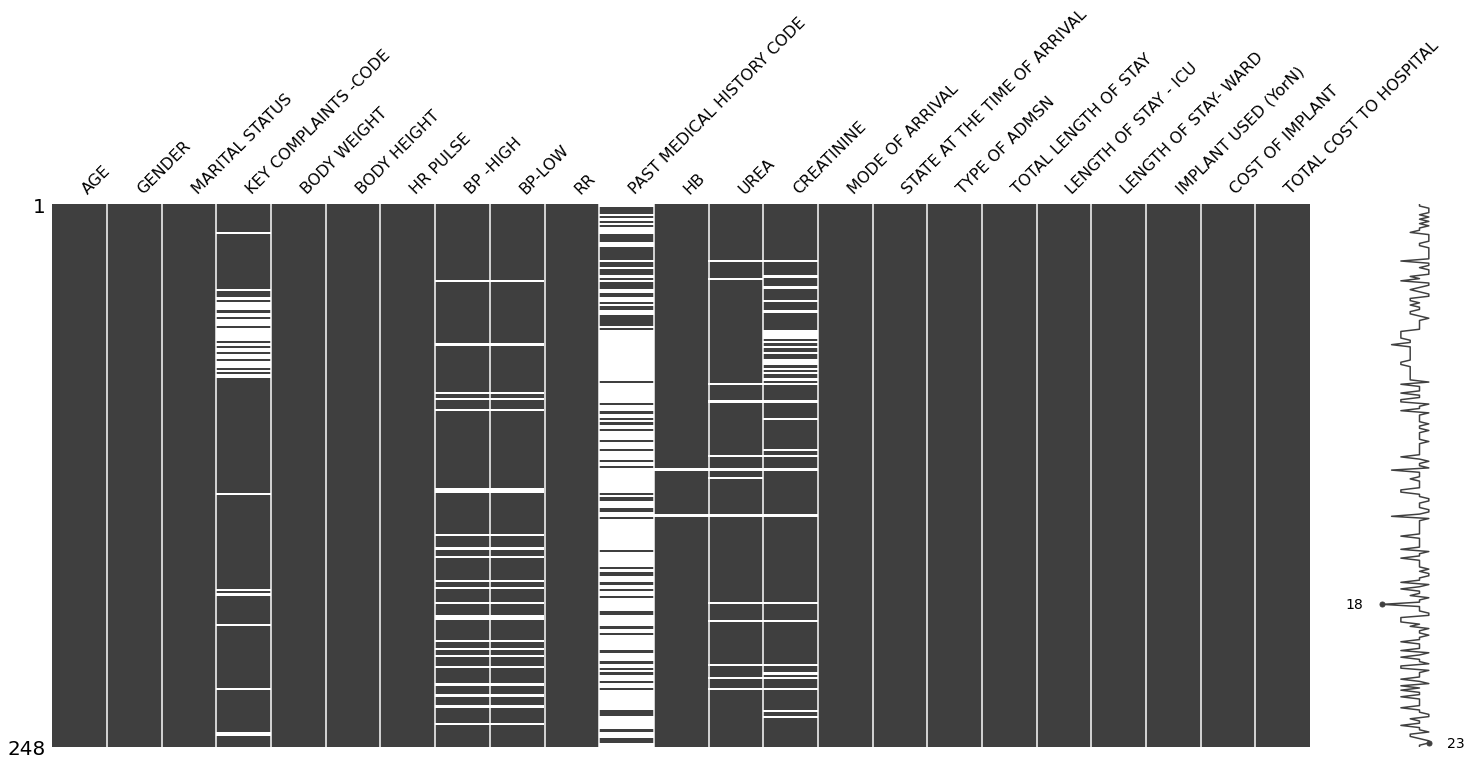

In [18]:
# generate preview of entries with null values
if df_reset.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df_reset[df_reset.isnull().any(axis=1)])
    missingno.matrix(df)
    plt.show()

In [19]:
# generate count statistics of duplicate entries
if len(df_reset[df_reset.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df_reset[df_reset.duplicated()]))
    print(df_reset[df_reset.duplicated(keep=False)].sort_values(by=list(df_reset.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  8
    AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  BODY HEIGHT  \
71  5.0      F      UNMARRIED   other- respiratory         15.0          117   
80  5.0      F      UNMARRIED   other- respiratory         15.0          117   
65  5.0      M      UNMARRIED   other- respiratory         15.0          105   
75  5.0      M      UNMARRIED   other- respiratory         15.0          105   
61  7.0      M      UNMARRIED                  NaN         19.0          107   

    HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  MODE OF ARRIVAL  \
71        80     110.0    80.0  24  ...        NaN        WALKED IN   
80        80     110.0    80.0  24  ...        NaN        WALKED IN   
65       115     113.0    70.0  26  ...        NaN        WALKED IN   
75       115     113.0    70.0  26  ...        NaN        WALKED IN   
61       100     103.0    76.0  26  ...        NaN        WALKED IN   

    STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN TOTAL LENGTH O

In [20]:
df_reset.drop_duplicates(inplace=True)

In [23]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")

In [24]:
def categorical_eda(df_reset):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df_reset.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df_reset.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df_reset)
        fig.set_xticklabels(rotation=90)
        plt.show()

To check: Unique count of non-numeric data
GENDER                           2
MARITAL STATUS                   2
KEY COMPLAINTS -CODE            13
PAST MEDICAL HISTORY CODE        7
MODE OF ARRIVAL                  3
STATE AT THE TIME OF ARRIVAL     2
TYPE OF ADMSN                    2
IMPLANT USED (YorN)              2
dtype: int64
Top 5 unique values of GENDER
  GENDER  Count
0      M    166
1      F     82
 
Top 5 unique values of MARITAL STATUS
  MARITAL STATUS  Count
0      UNMARRIED    140
1        MARRIED    108
 
Top 5 unique values of KEY COMPLAINTS -CODE
  KEY COMPLAINTS -CODE  Count
0         other- heart     55
1              CAD-DVD     27
2                  RHD     26
3              CAD-TVD     24
4                 ACHD     19
 
Top 5 unique values of PAST MEDICAL HISTORY CODE
  PAST MEDICAL HISTORY CODE  Count
0             hypertension1     20
1                     other     15
2             hypertension2     13
3                 Diabetes1     10
4                 Diab

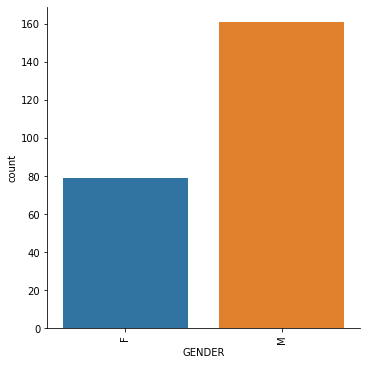

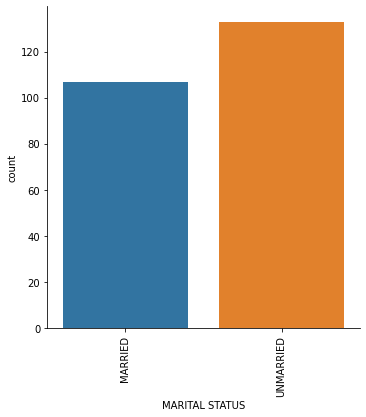

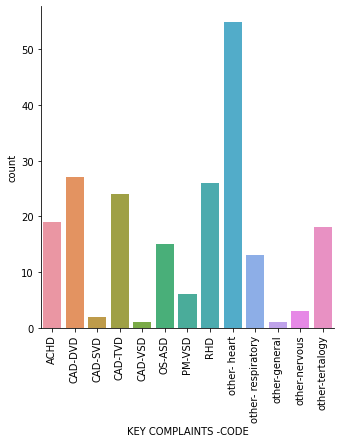

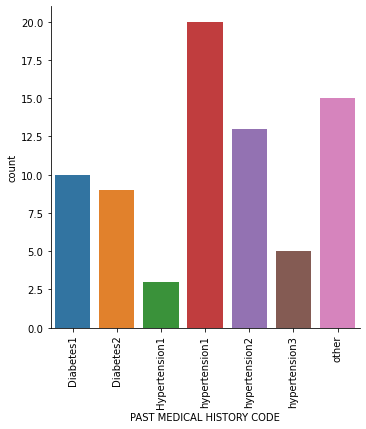

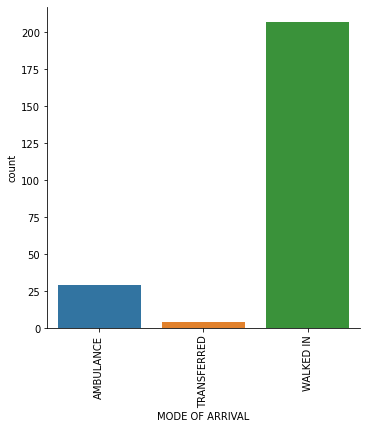

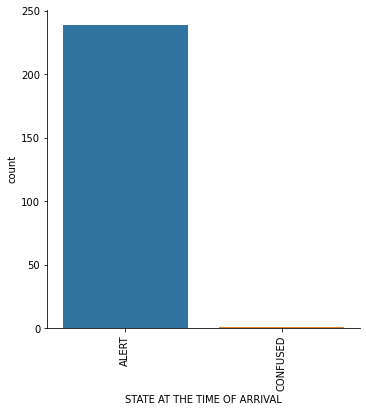

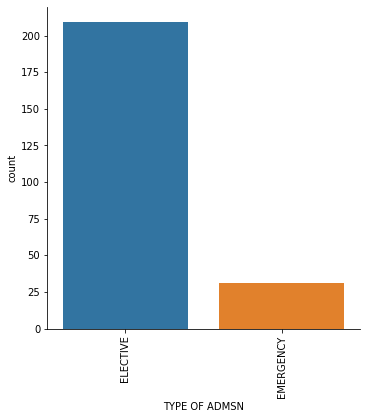

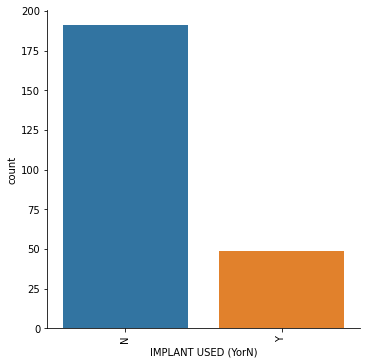

In [25]:
categorical_eda(df_reset)

In [26]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='bar', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
AGE,240.0,29.421665,26.109825,0.032877,6.000,16.0,55.00,88.0
BODY WEIGHT,240.0,37.796333,23.264139,2.020000,15.000,41.0,59.00,85.0
BODY HEIGHT,240.0,130.245833,39.705532,19.000000,99.750,149.0,160.00,185.0
HR PULSE,240.0,92.270833,20.433728,41.000000,78.000,90.0,104.00,155.0
BP -HIGH,217.0,115.271889,22.877791,70.000000,100.000,110.0,130.00,215.0
BP-LOW,217.0,71.935484,15.481933,39.000000,60.000,70.0,80.00,140.0
RR,240.0,23.475000,3.853950,12.000000,22.000,24.0,24.00,42.0
HB,238.0,12.933025,3.119777,5.000000,11.325,12.4,14.00,25.7
UREA,227.0,26.809251,16.198660,2.000000,18.000,23.0,30.00,143.0
CREATININE,211.0,0.742180,0.552719,0.100000,0.300,0.6,1.00,5.2


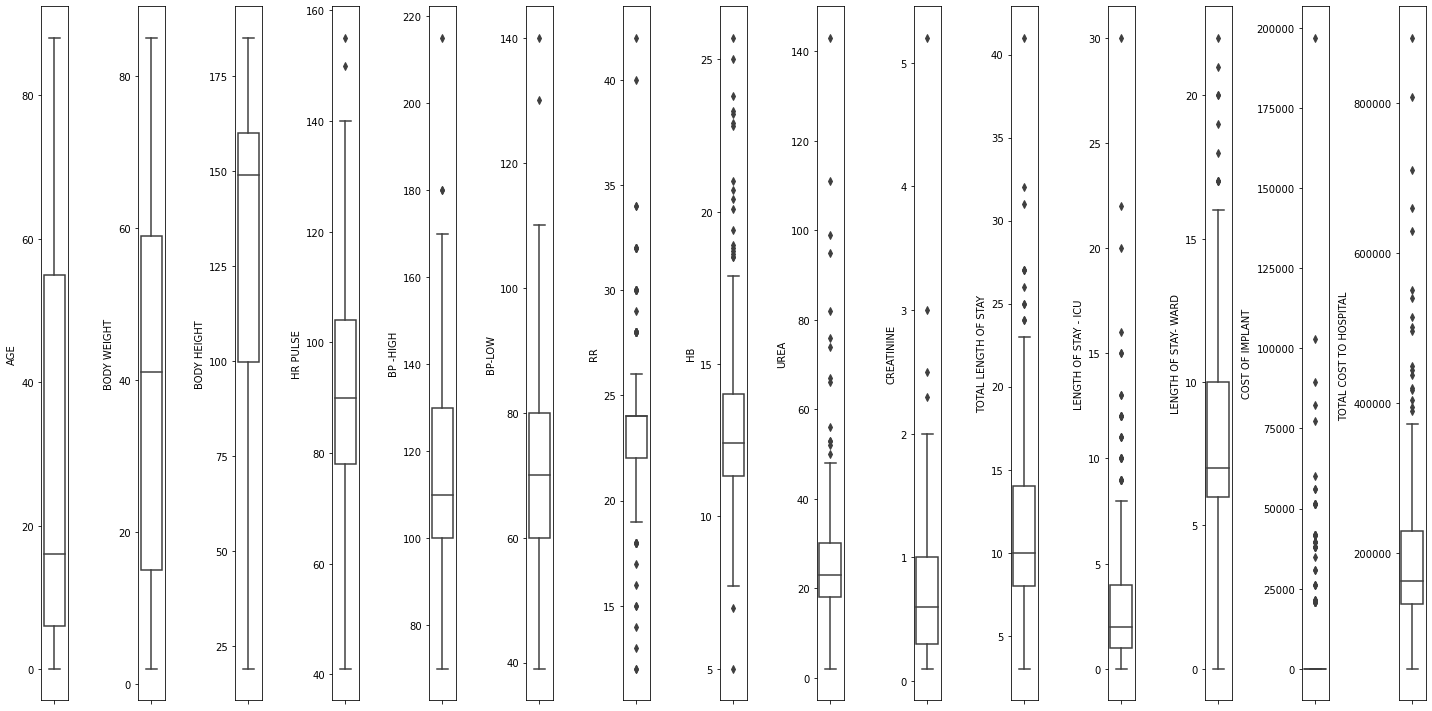

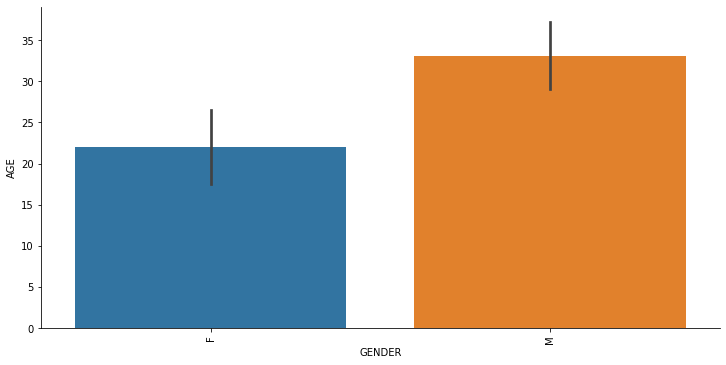

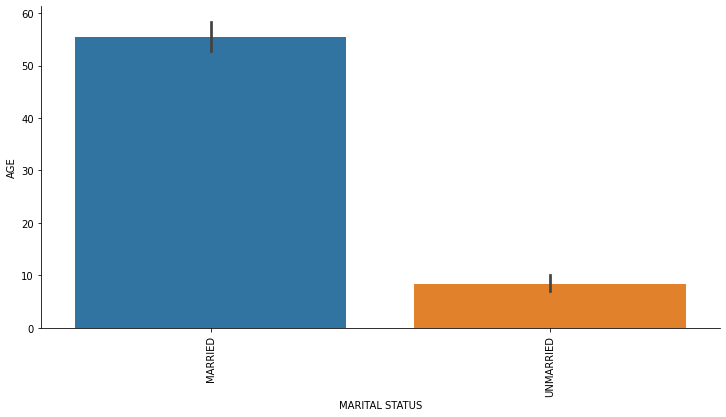

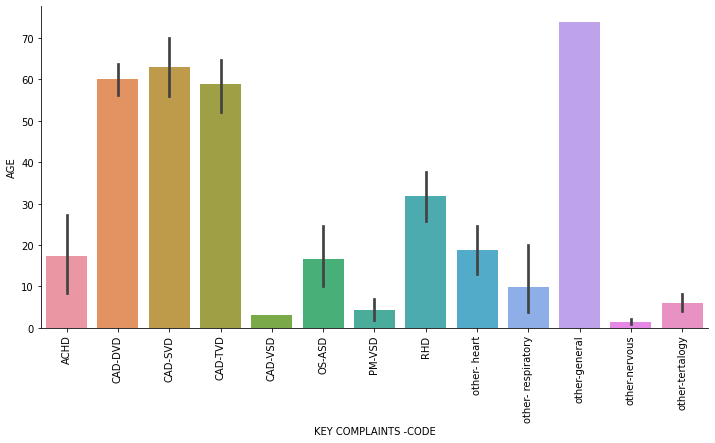

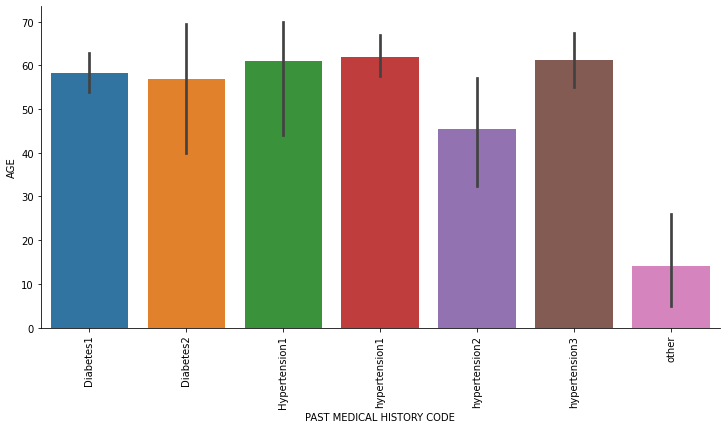

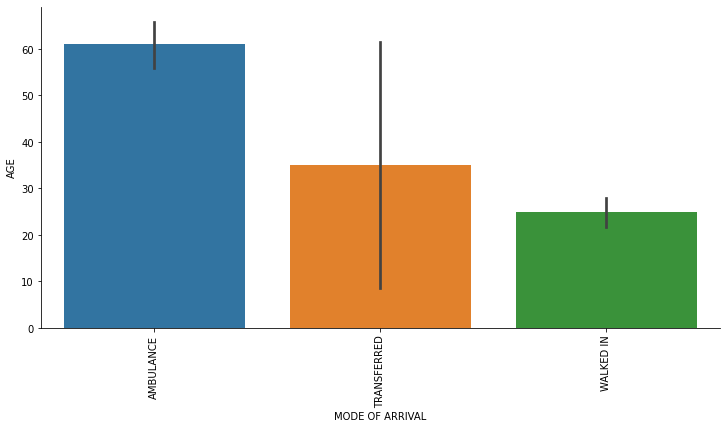

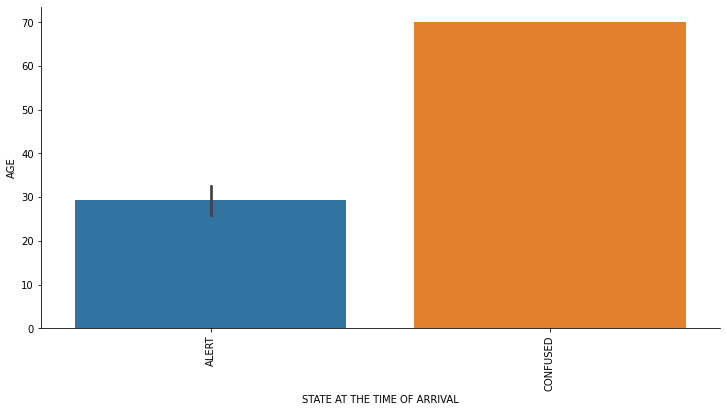

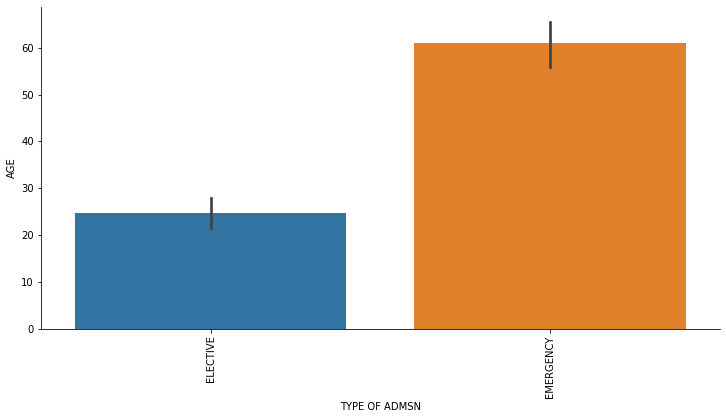

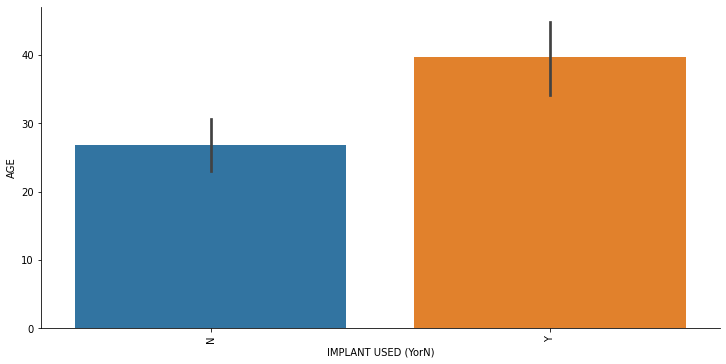

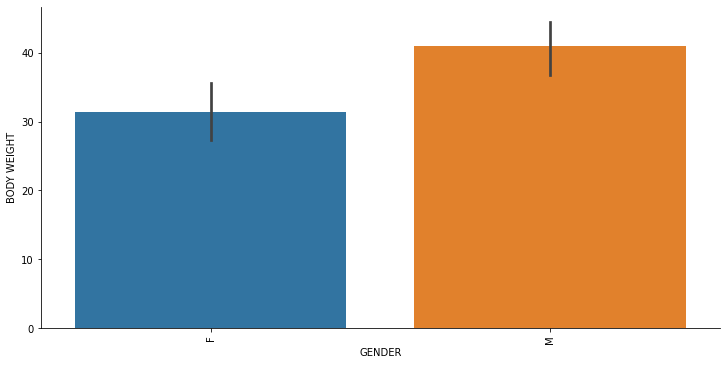

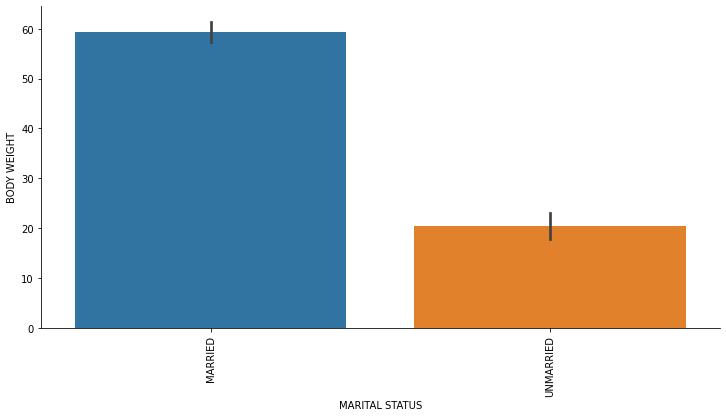

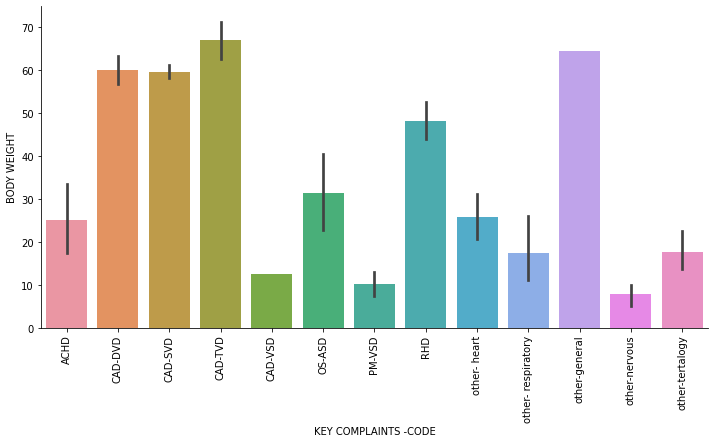

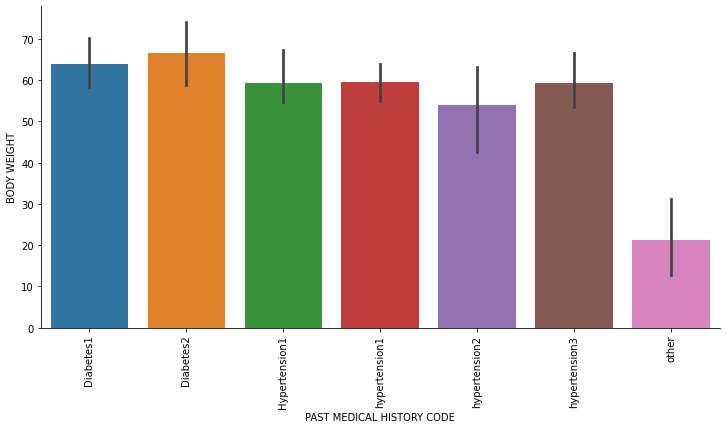

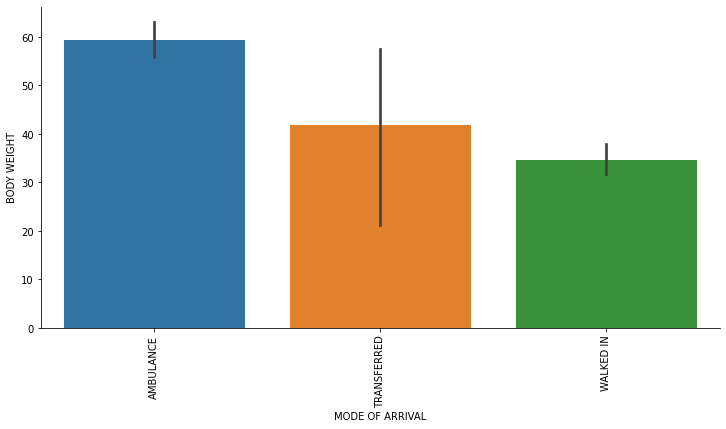

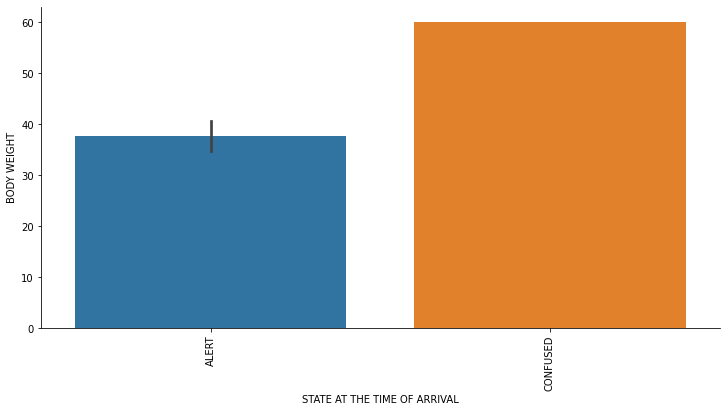

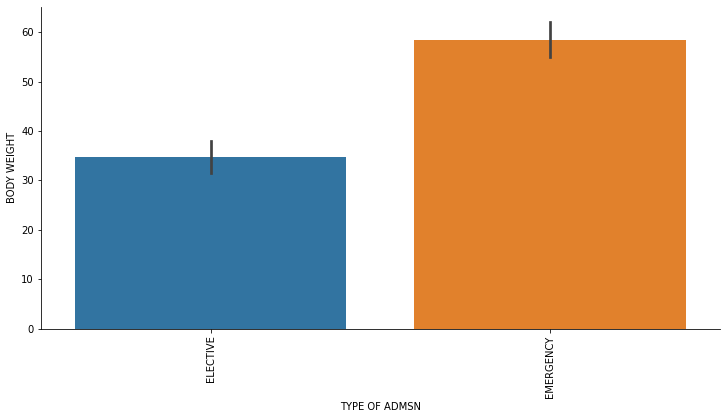

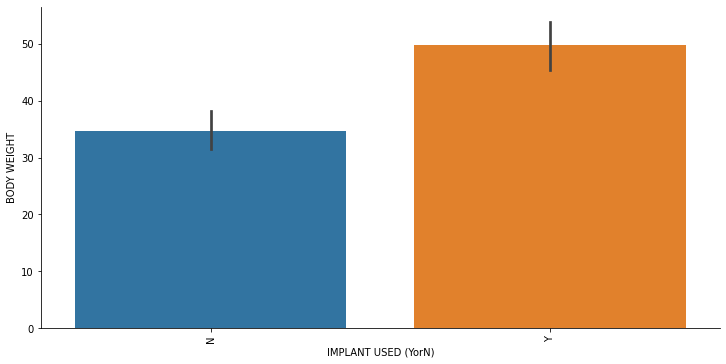

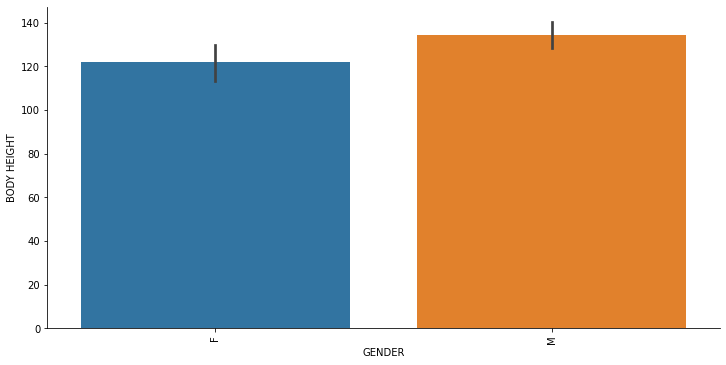

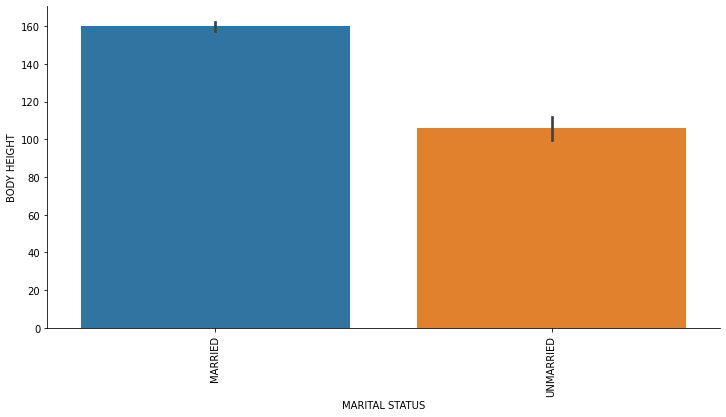

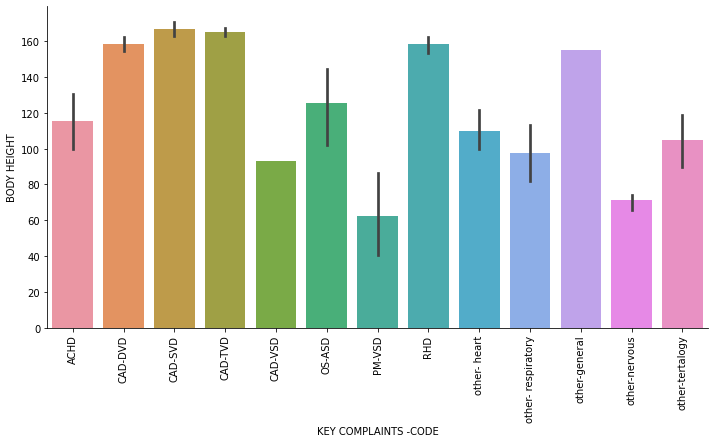

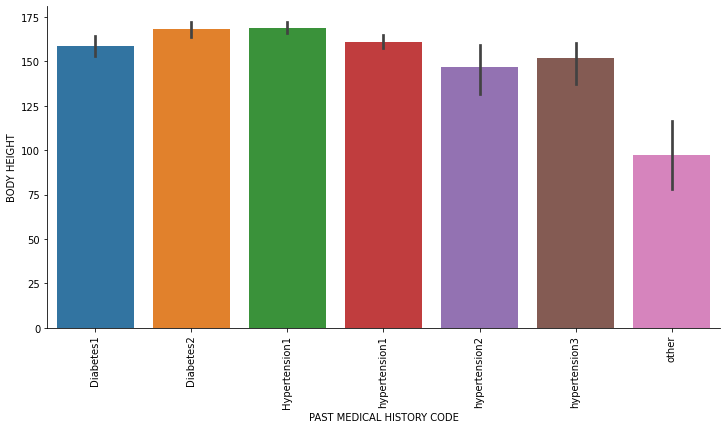

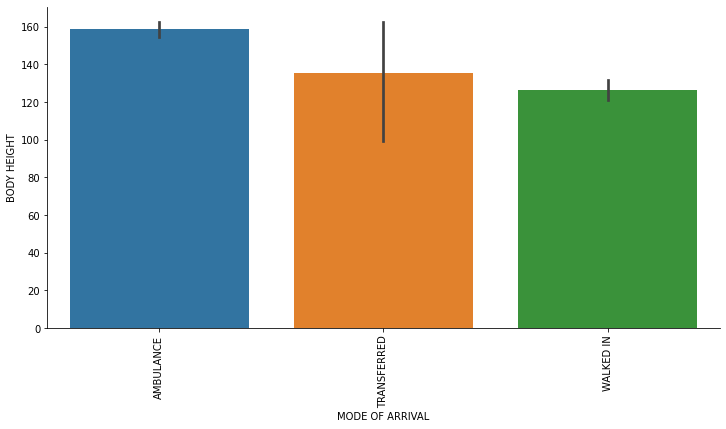

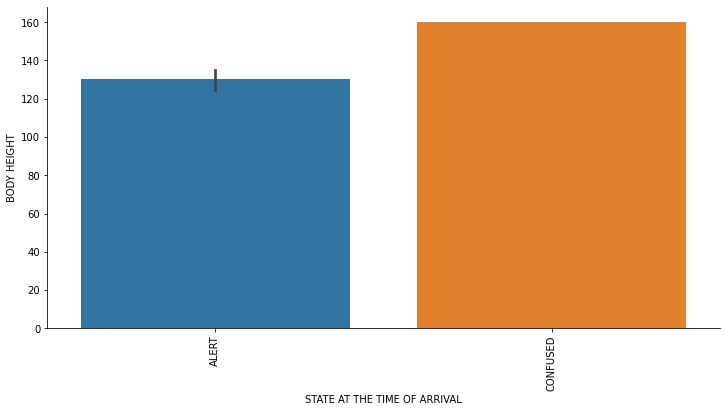

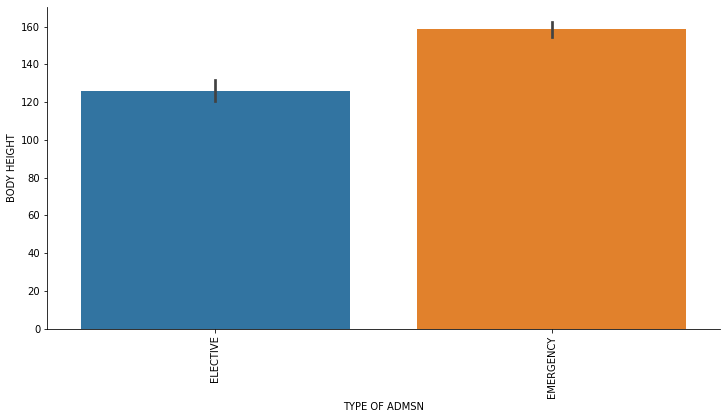

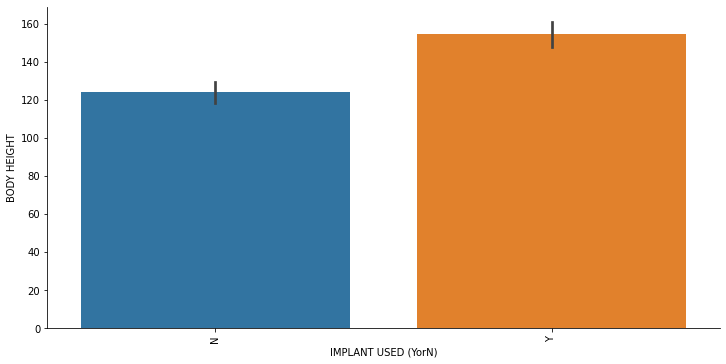

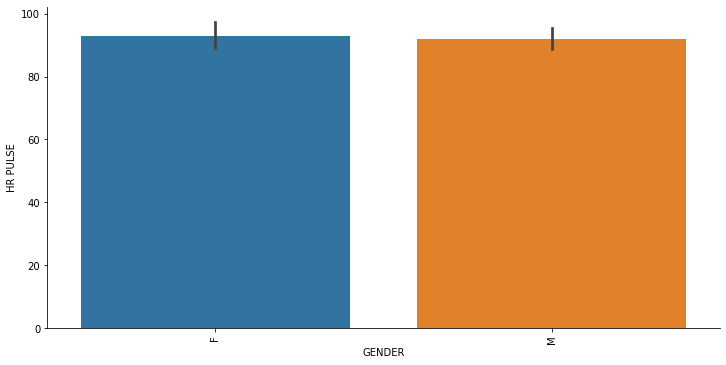

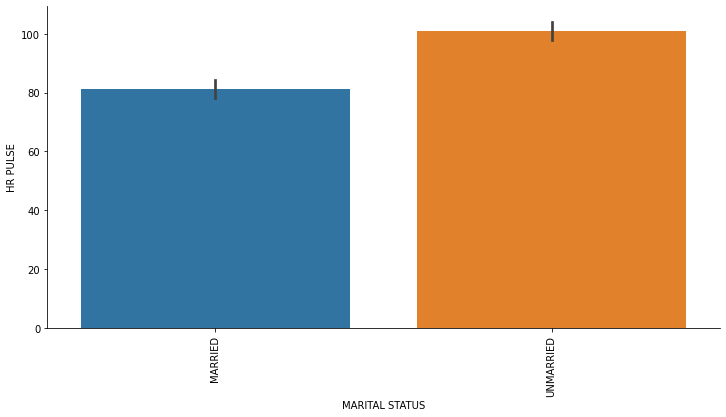

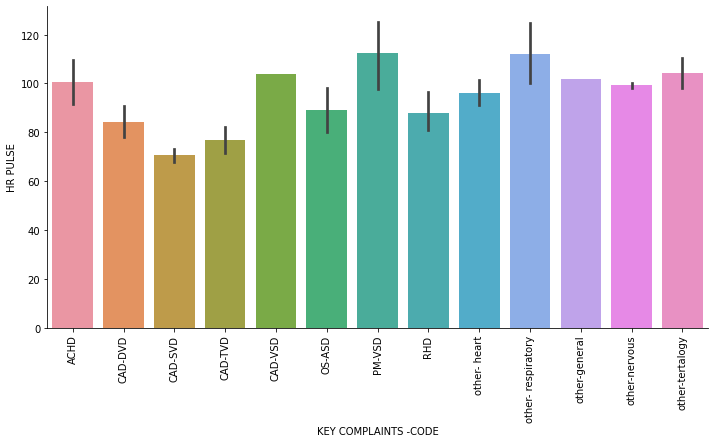

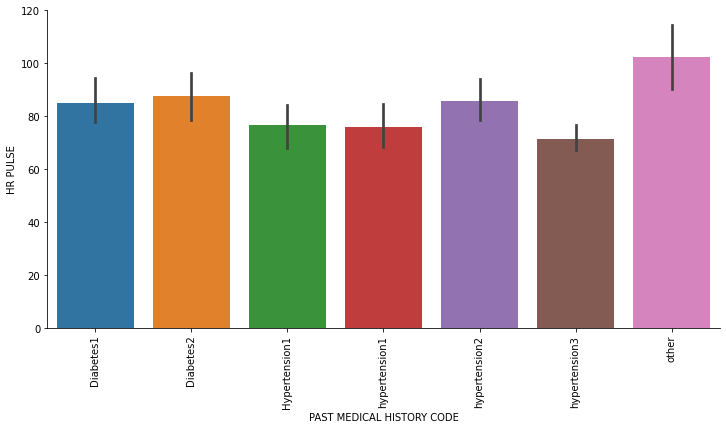

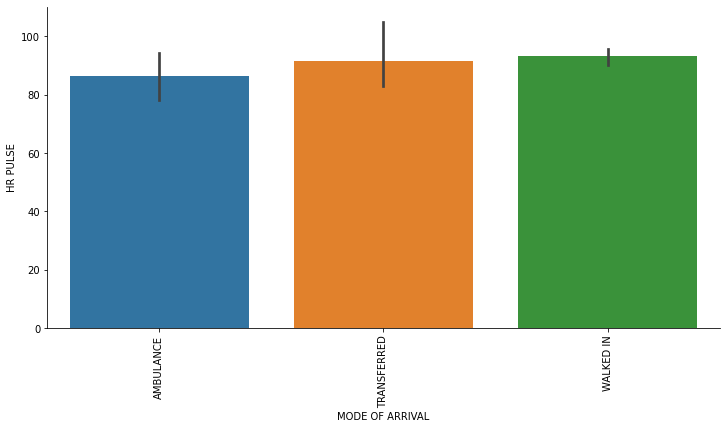

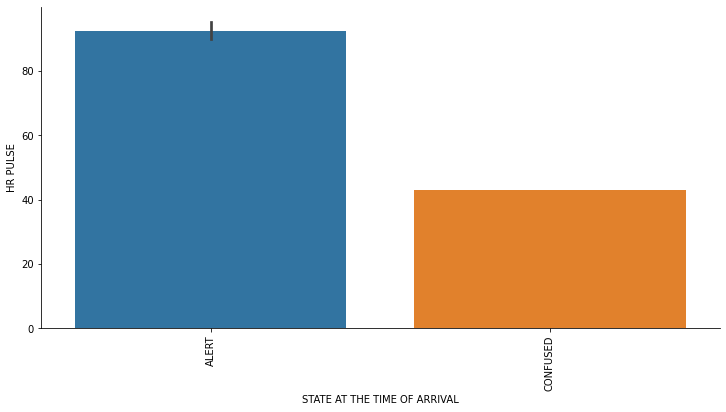

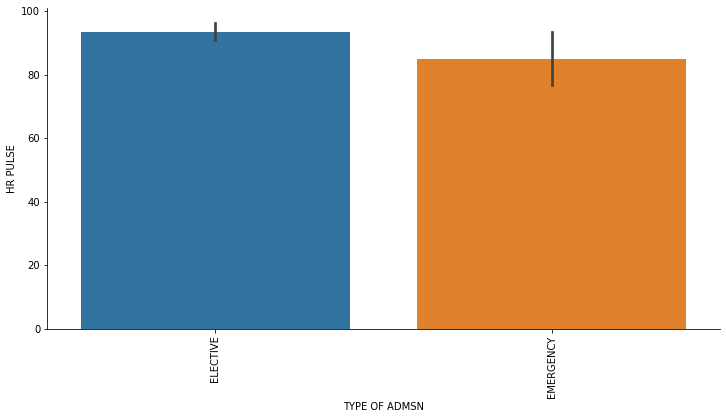

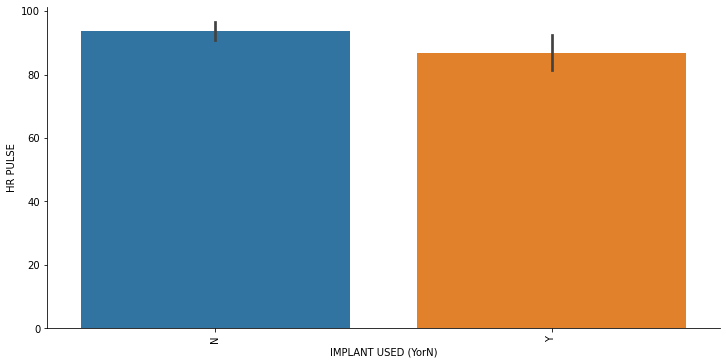

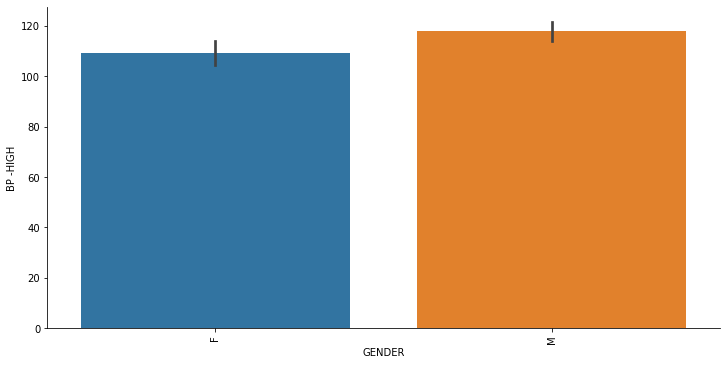

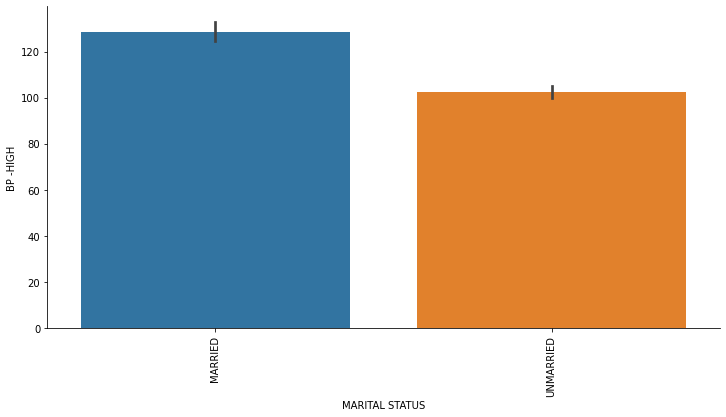

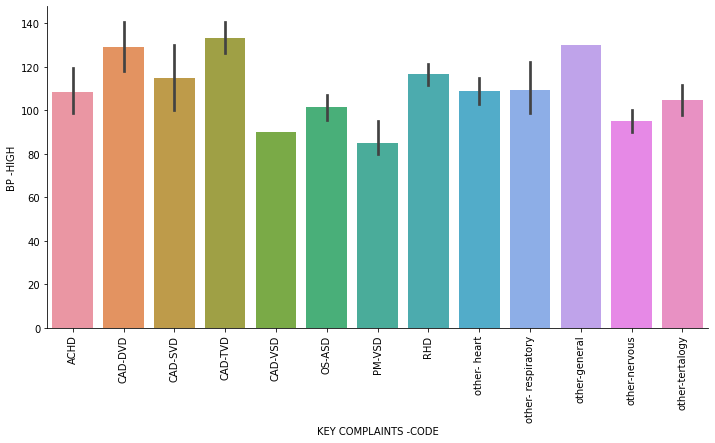

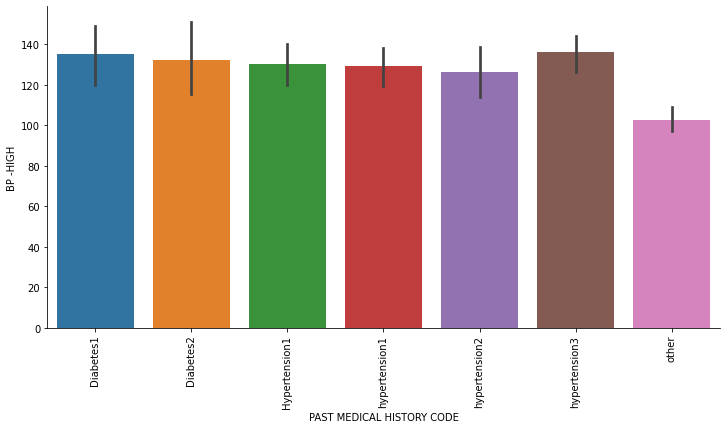

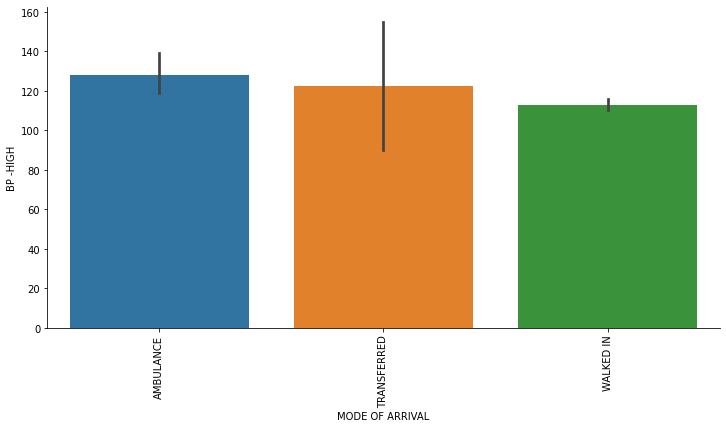

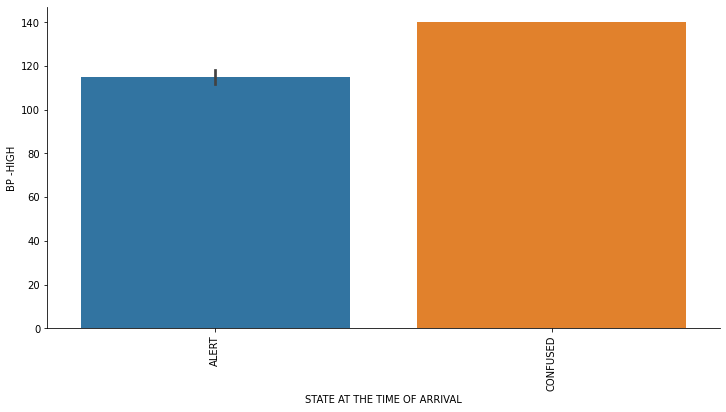

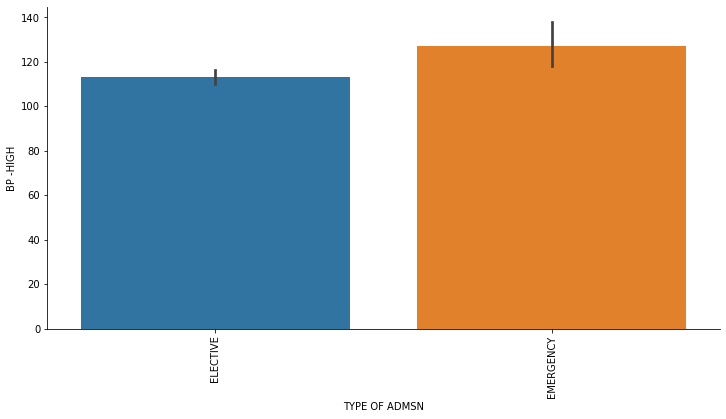

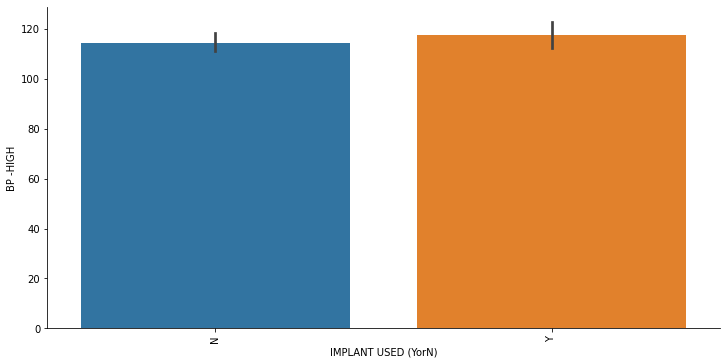

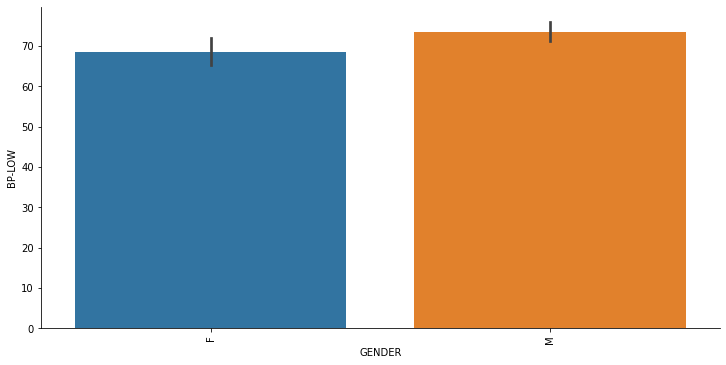

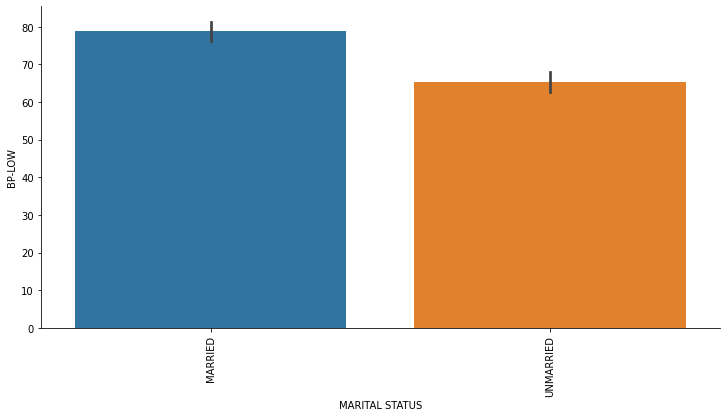

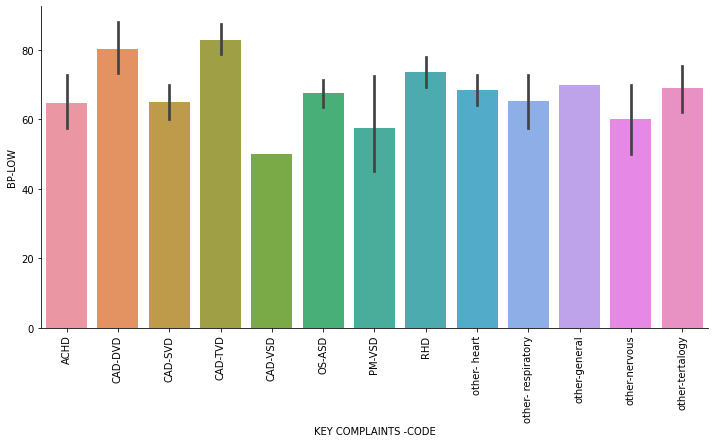

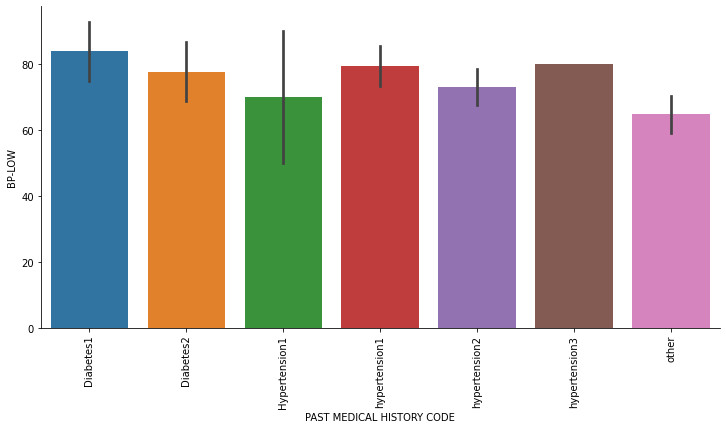

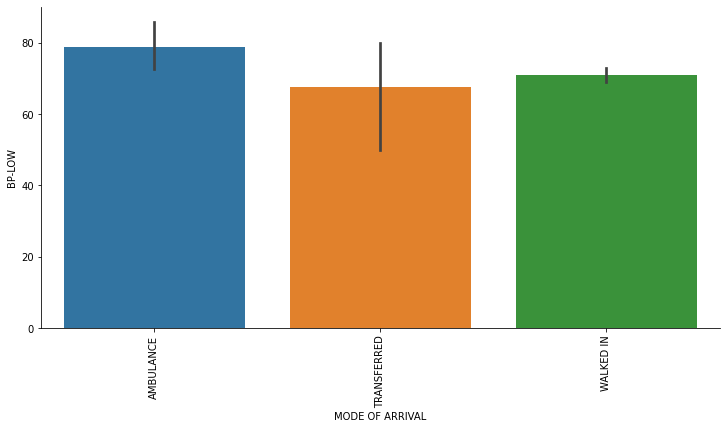

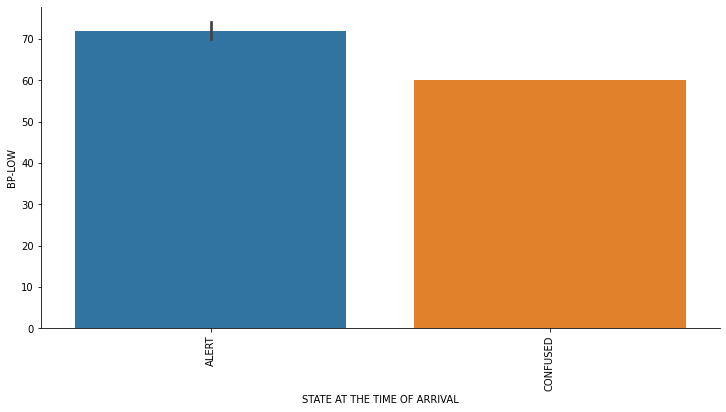

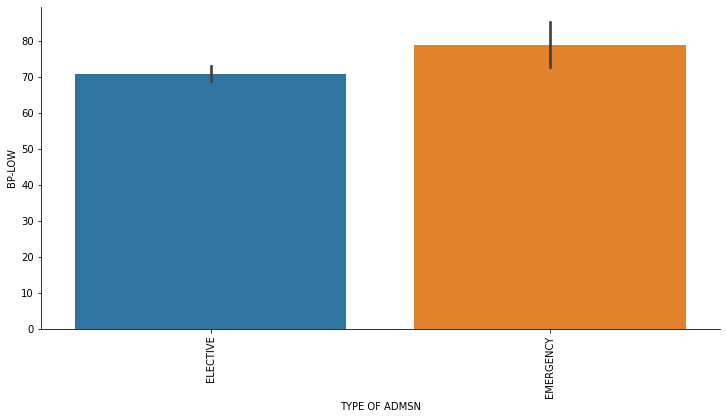

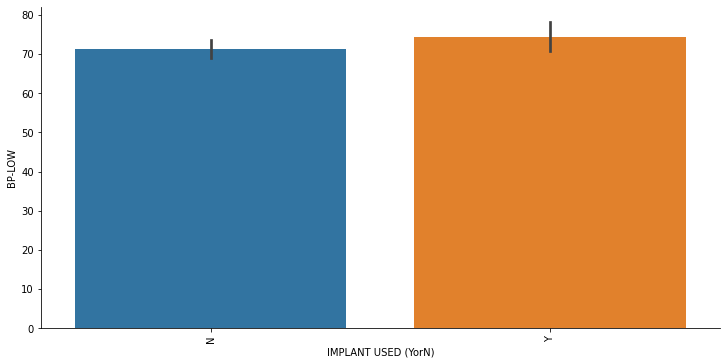

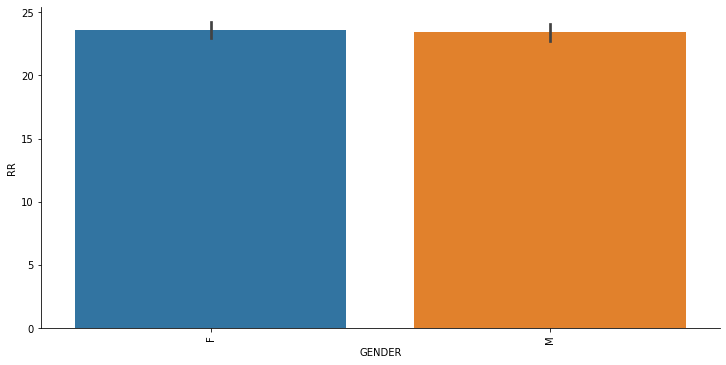

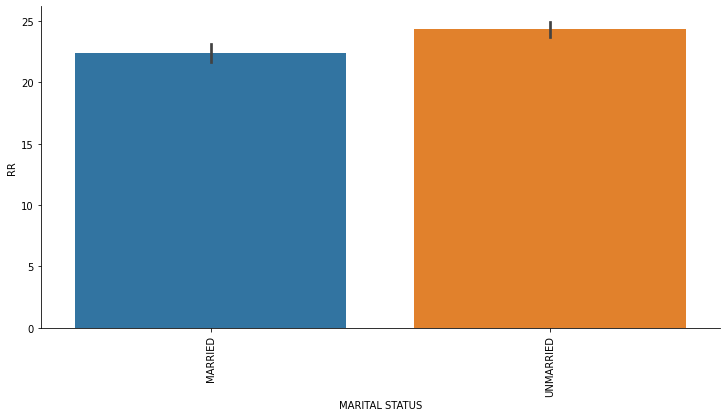

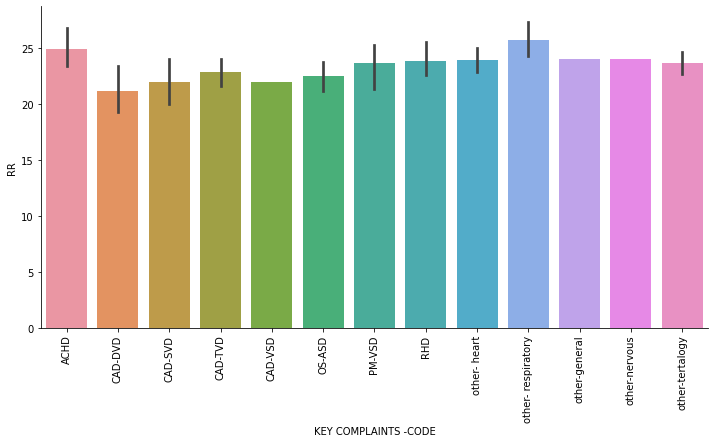

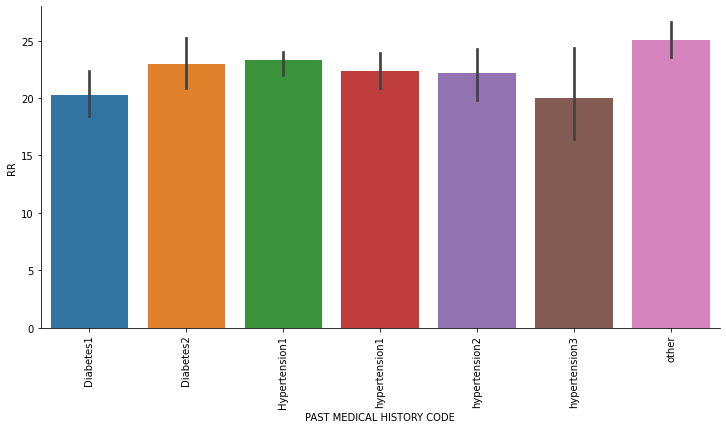

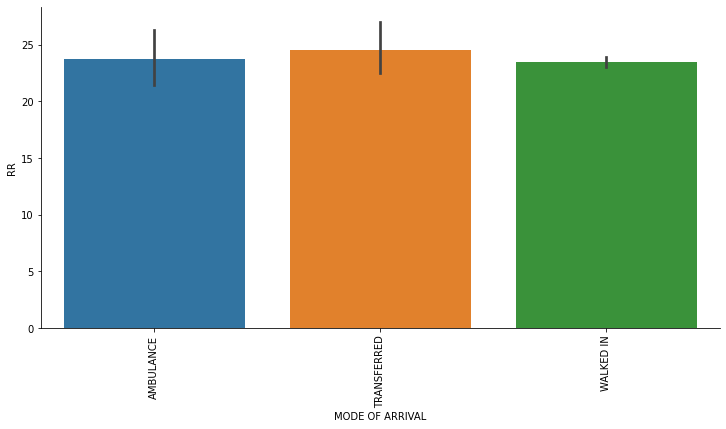

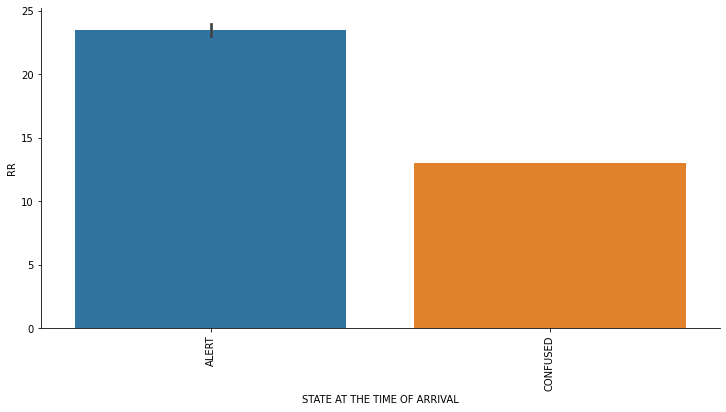

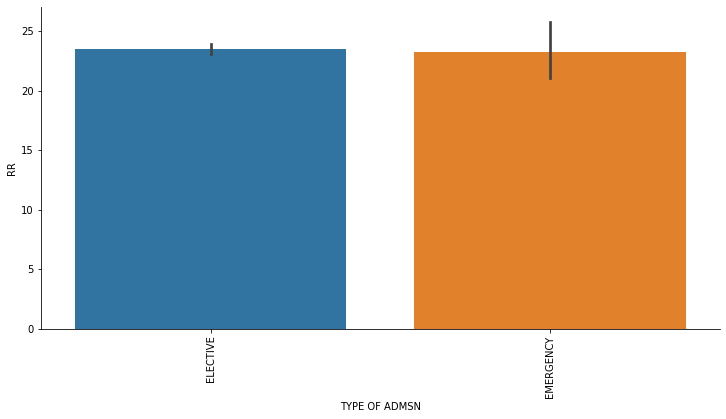

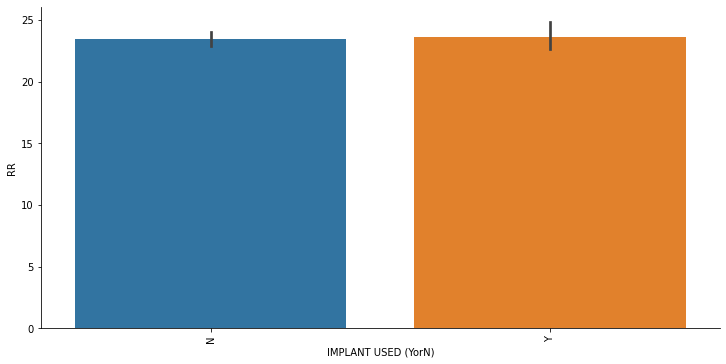

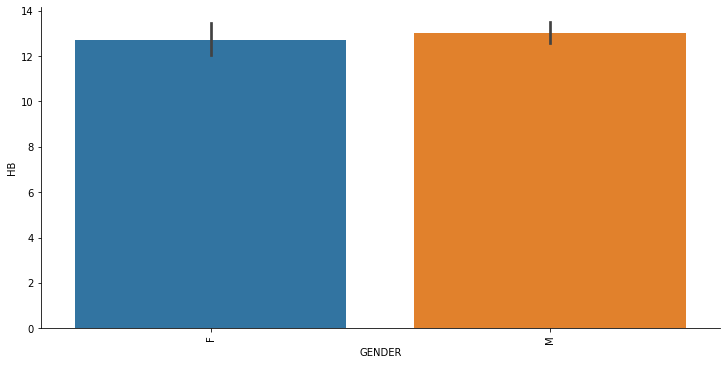

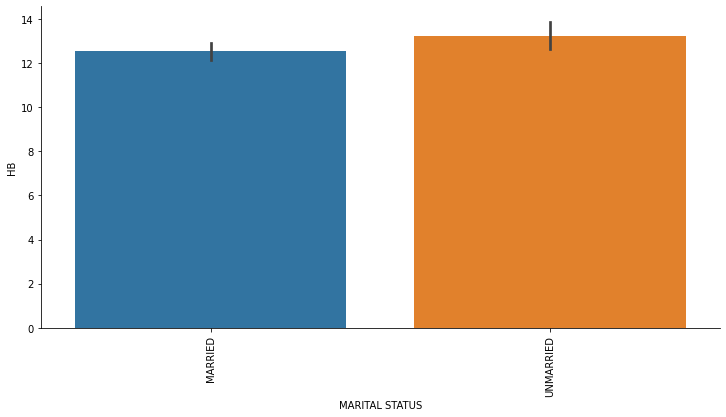

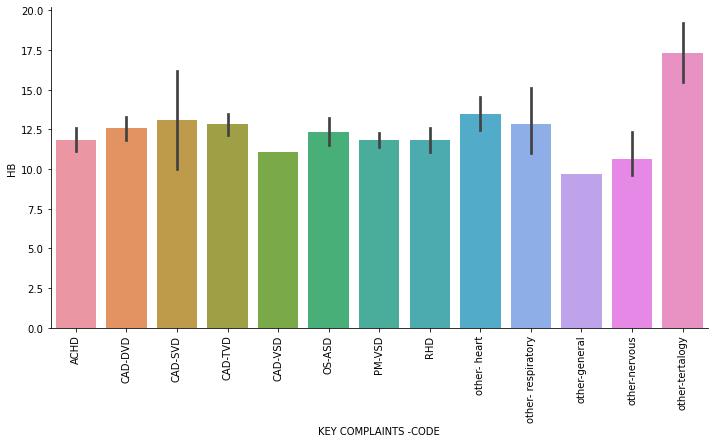

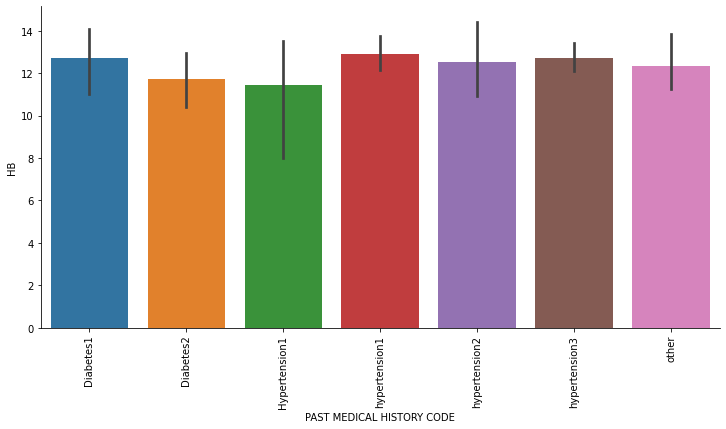

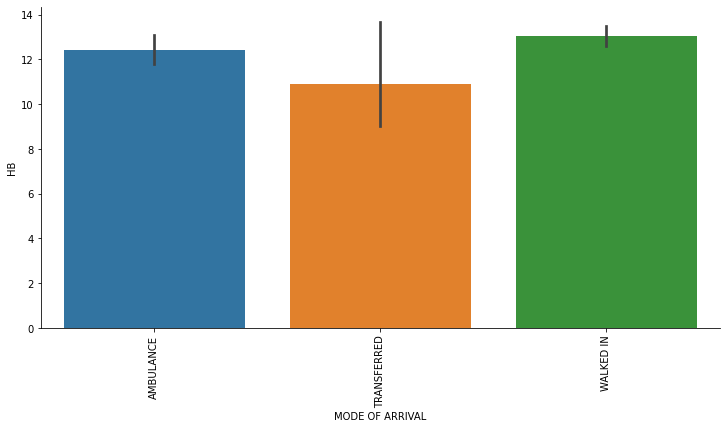

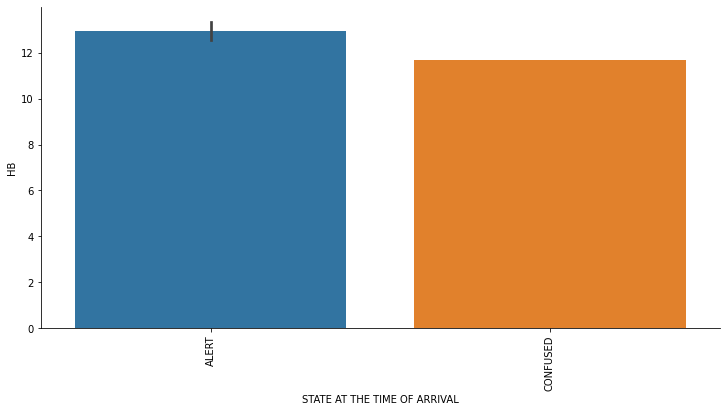

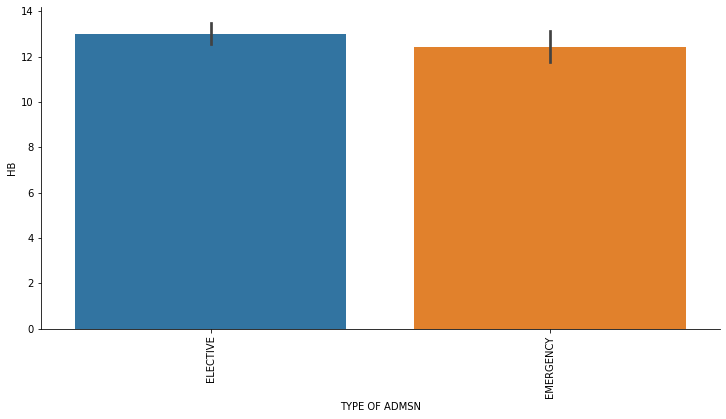

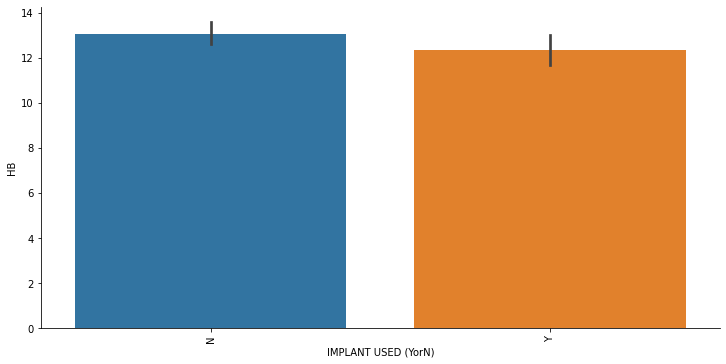

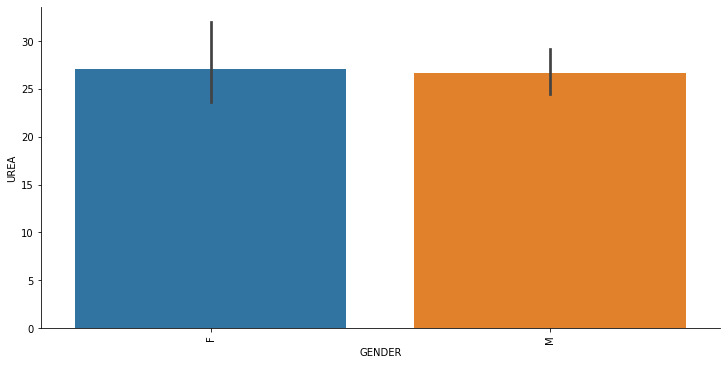

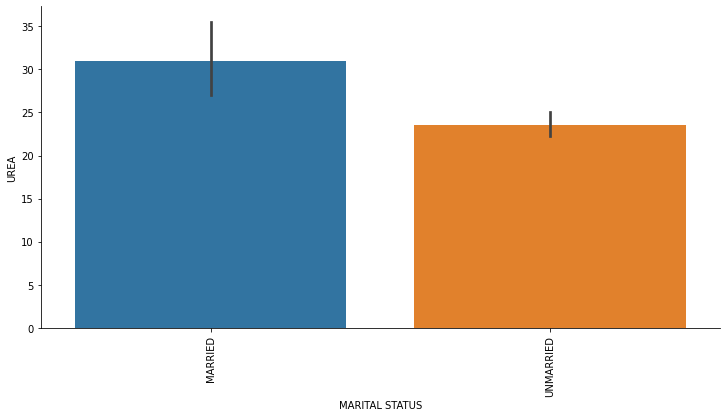

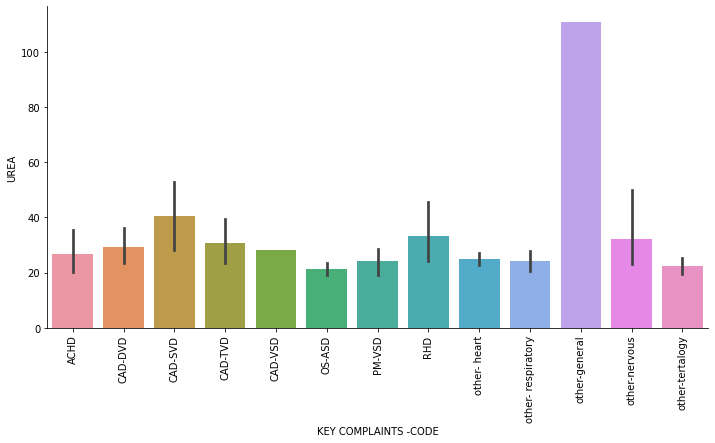

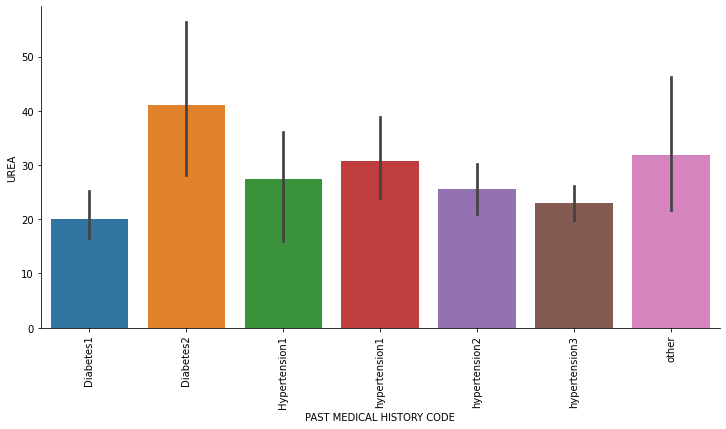

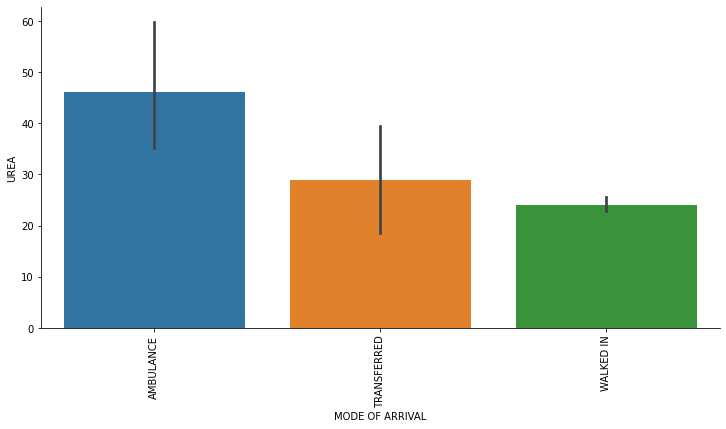

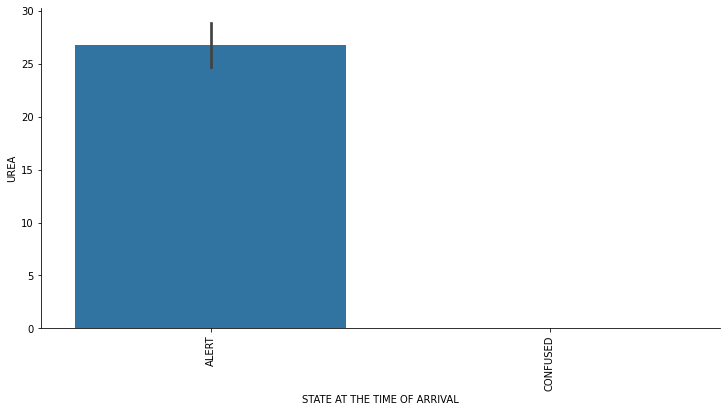

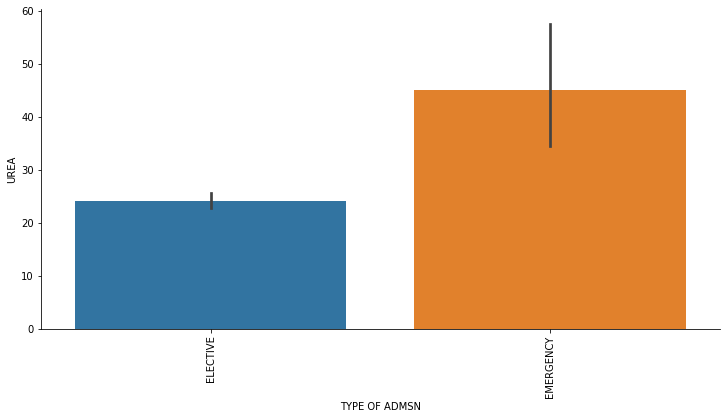

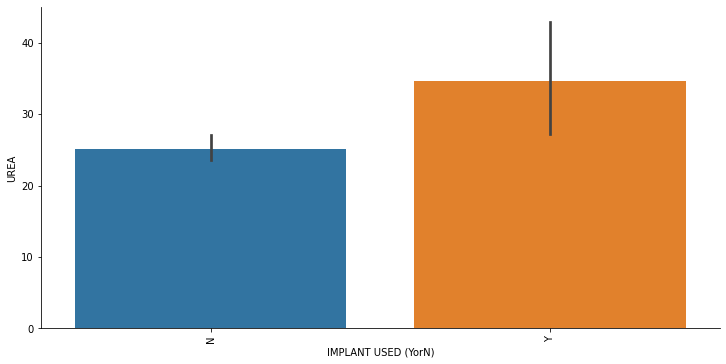

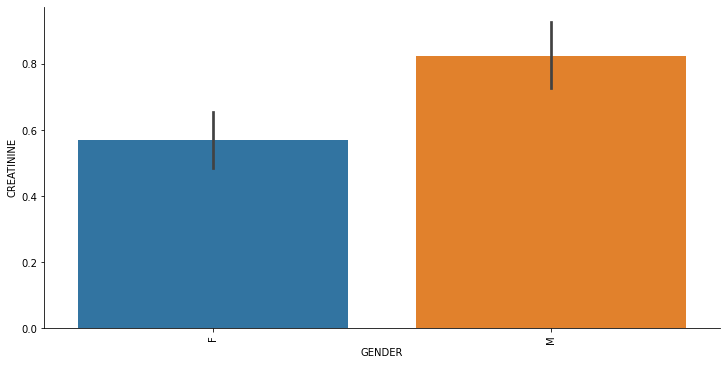

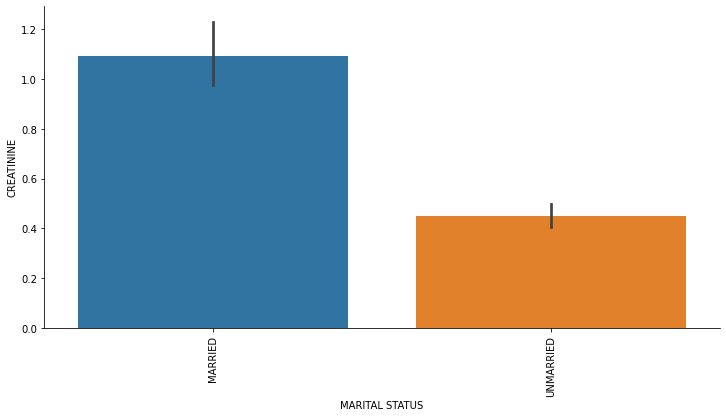

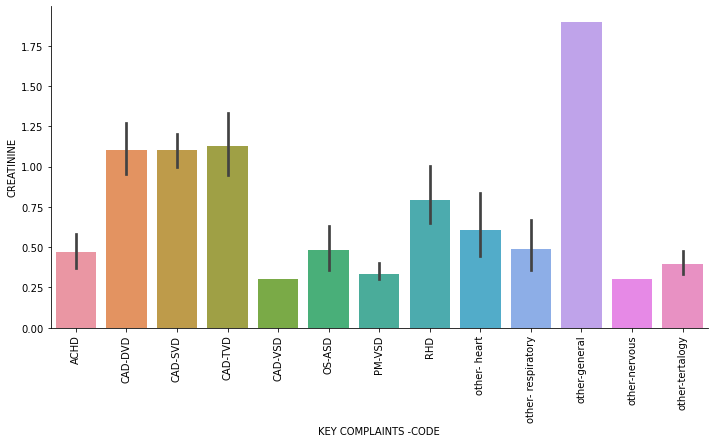

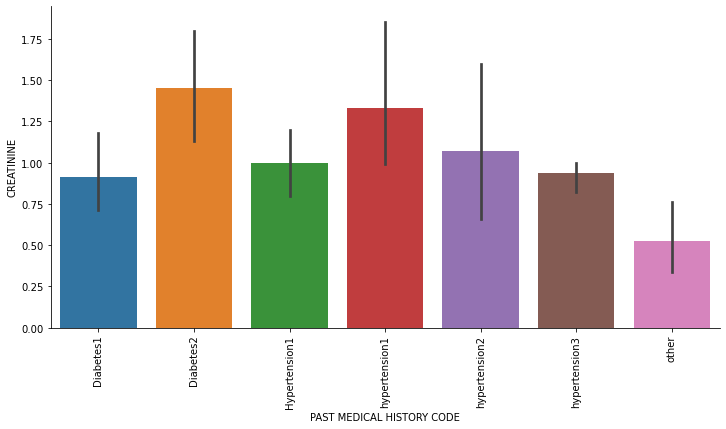

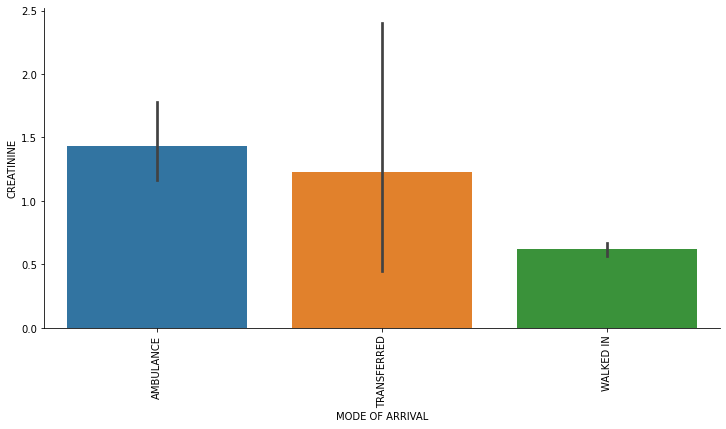

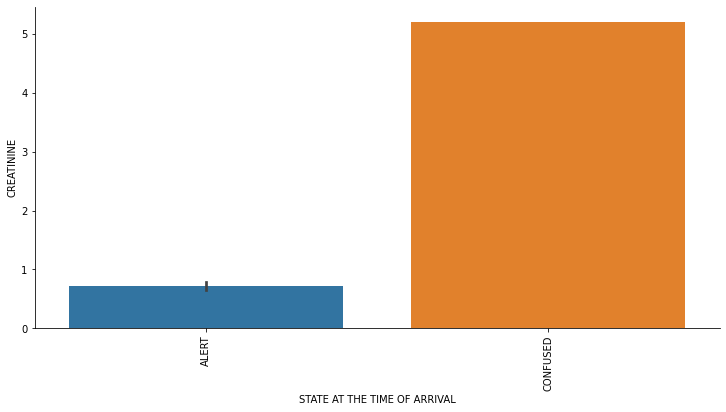

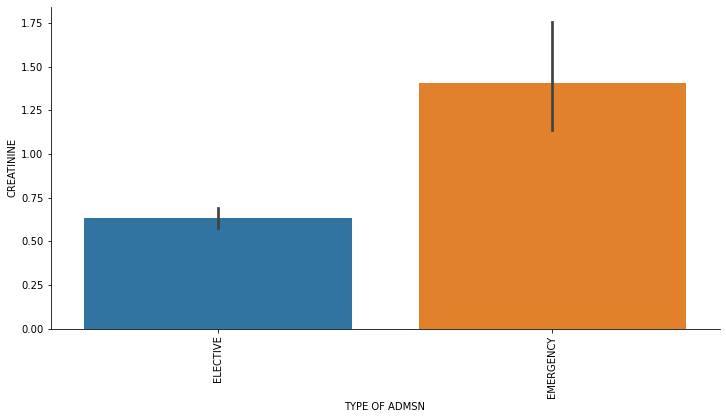

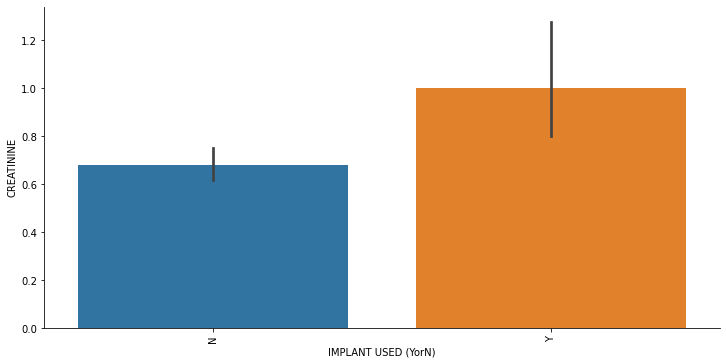

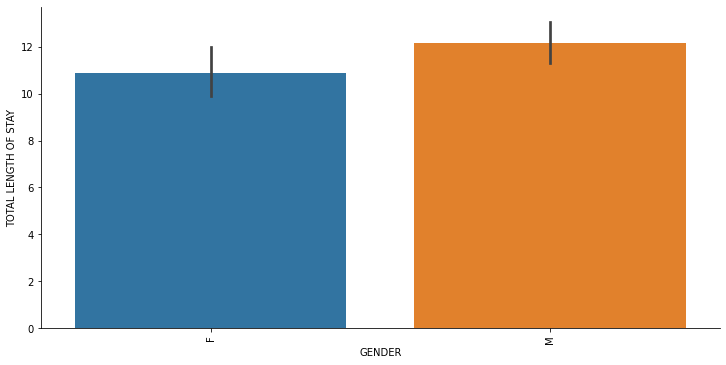

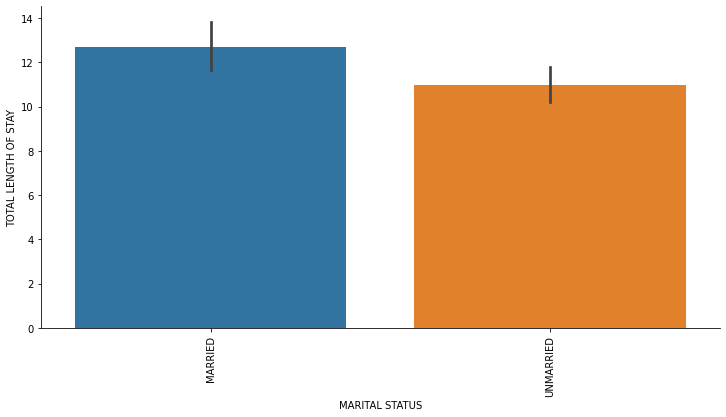

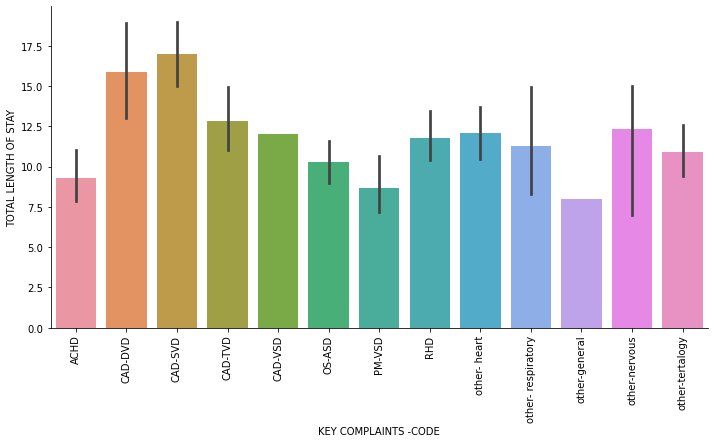

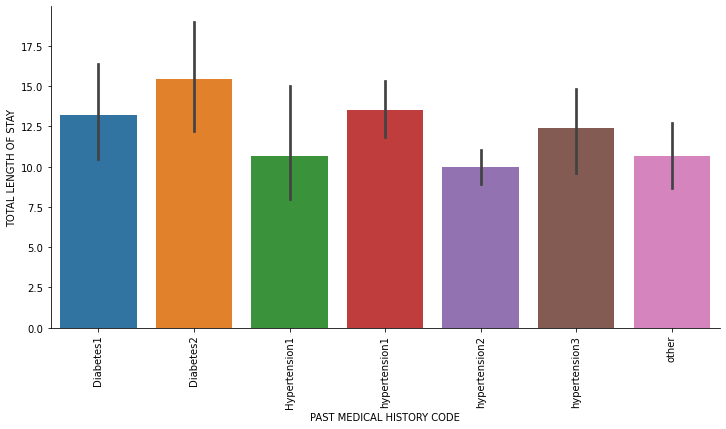

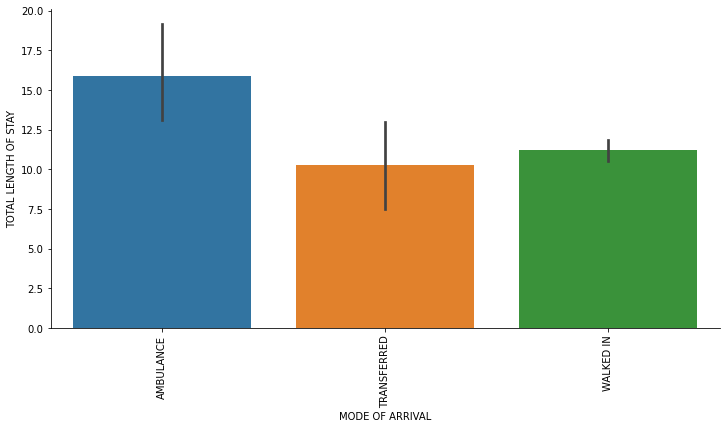

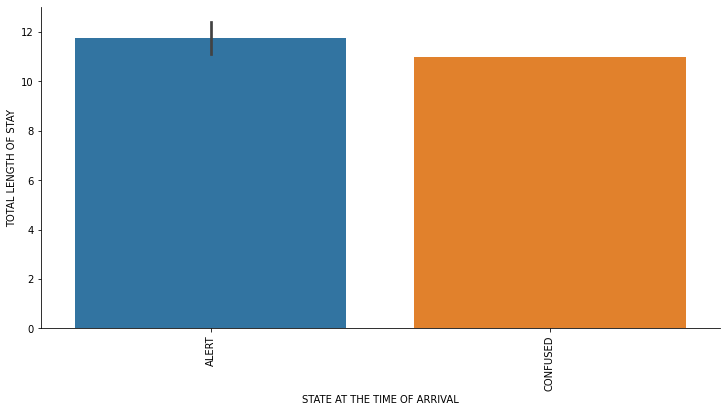

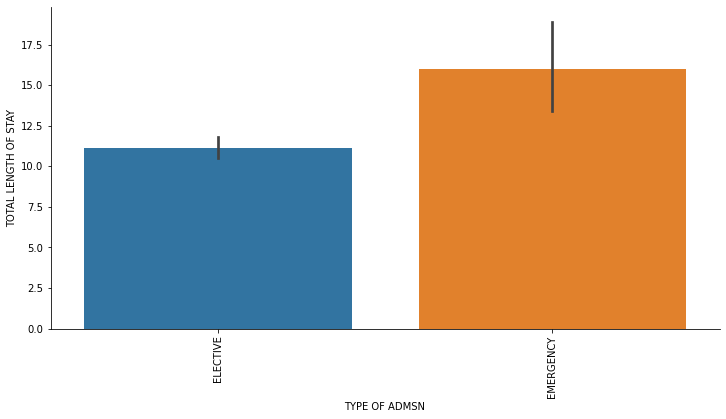

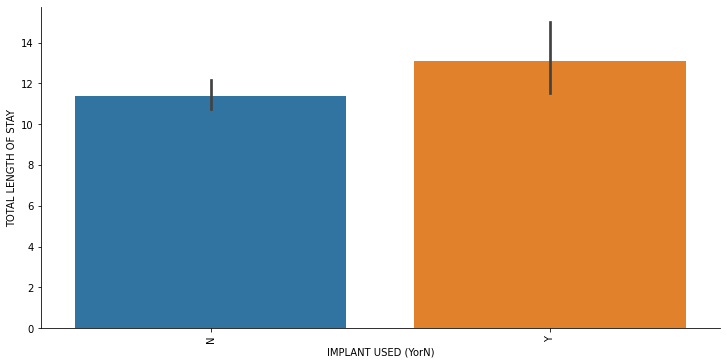

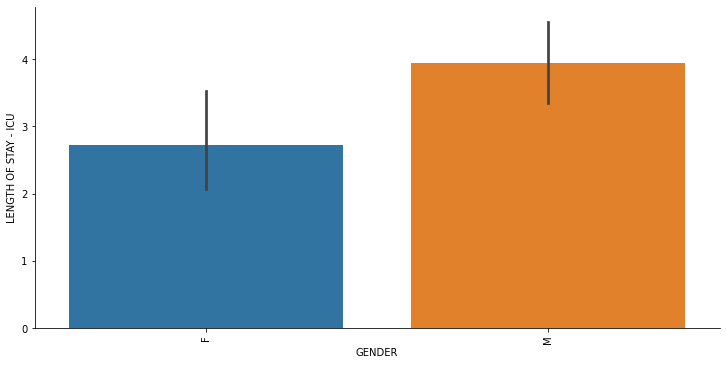

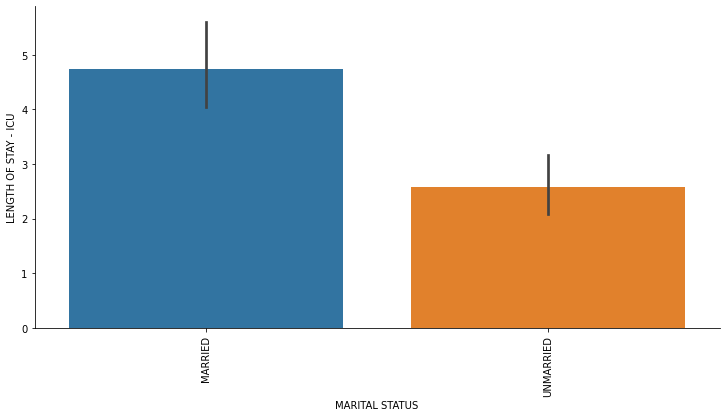

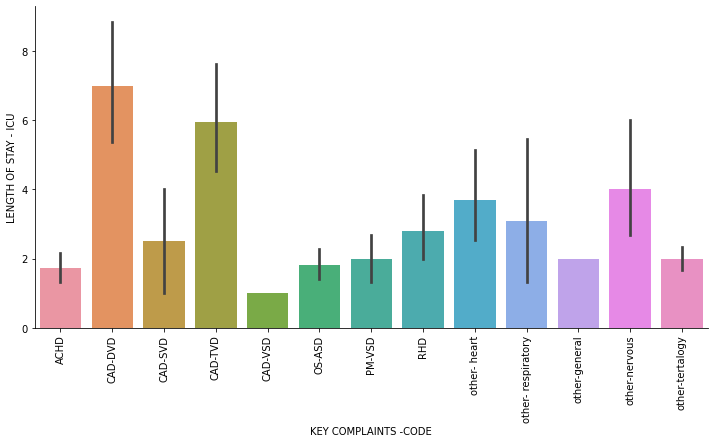

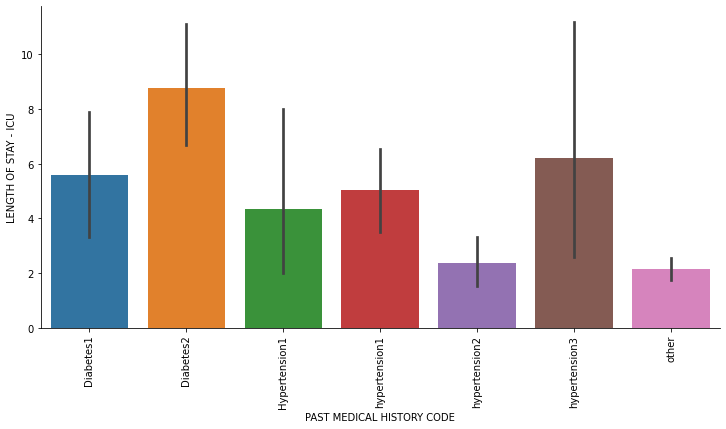

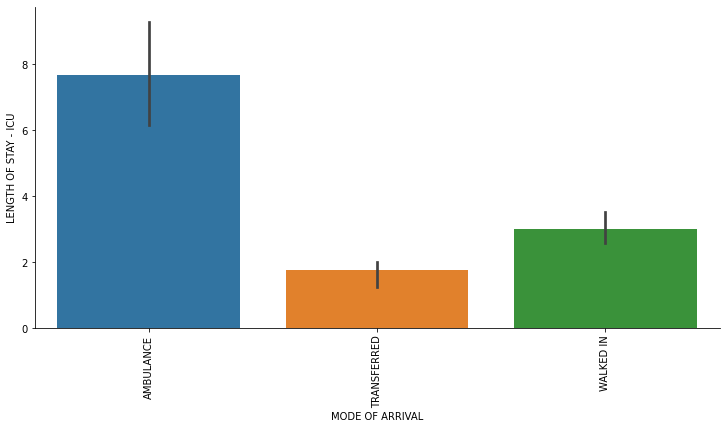

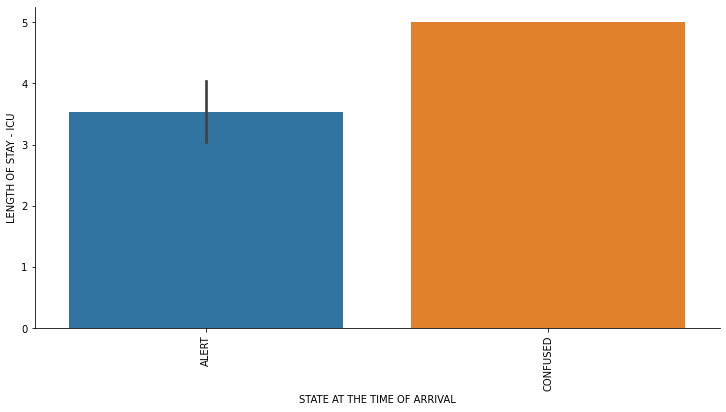

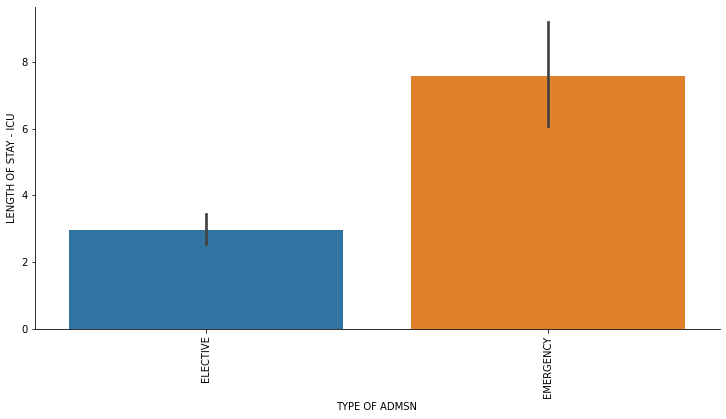

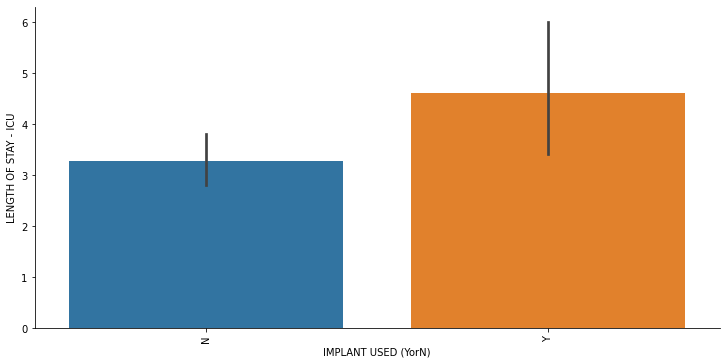

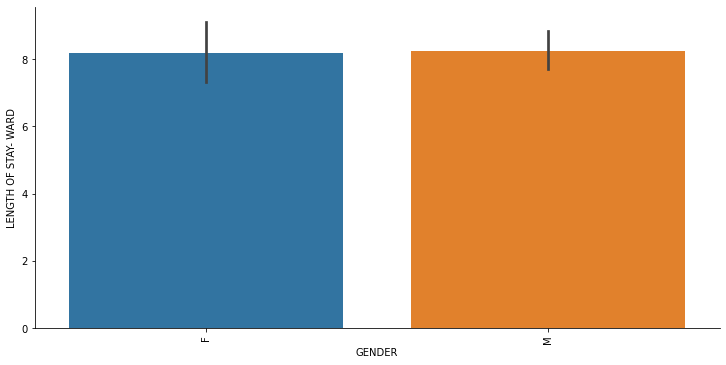

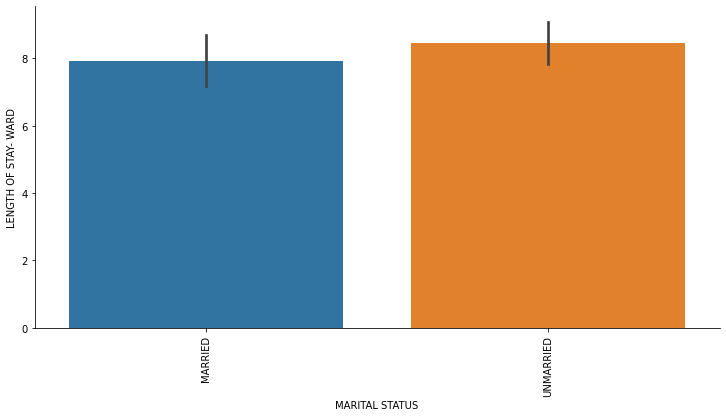

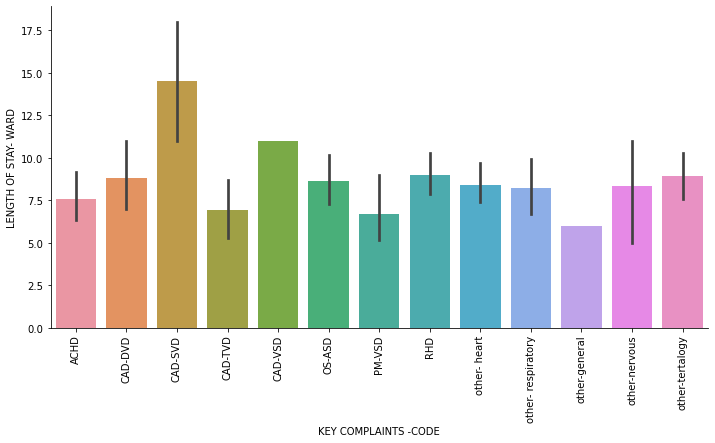

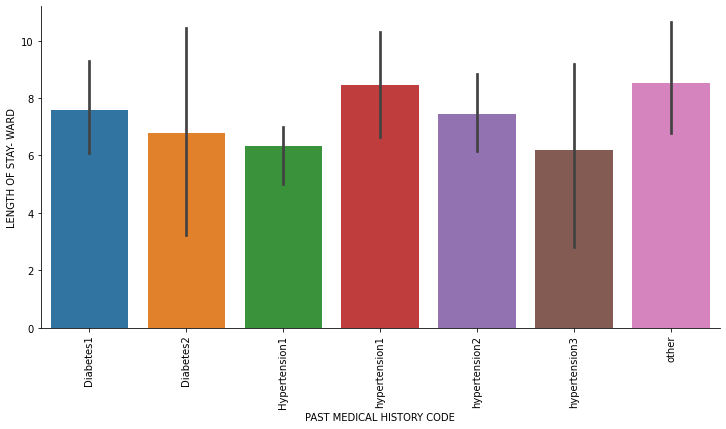

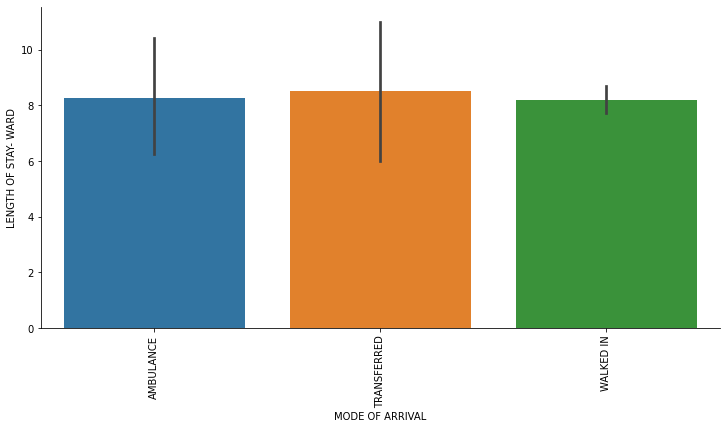

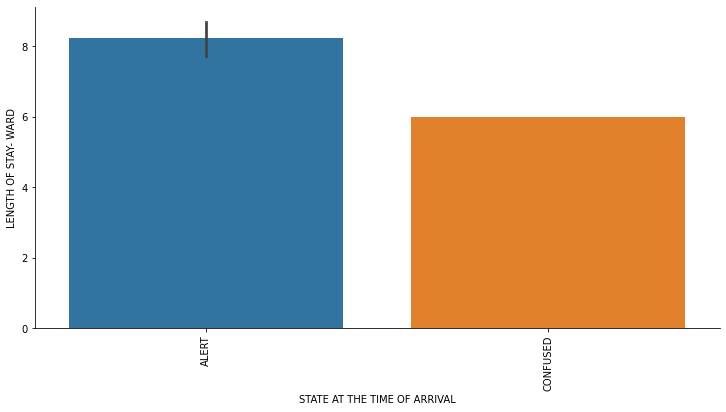

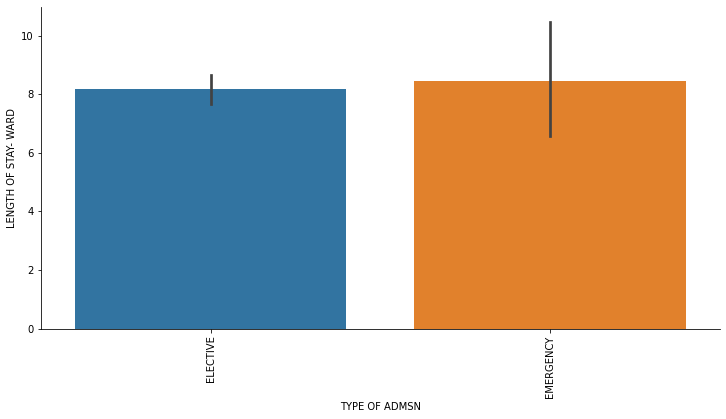

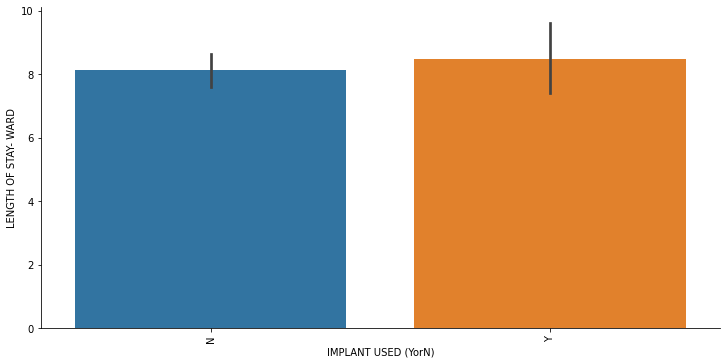

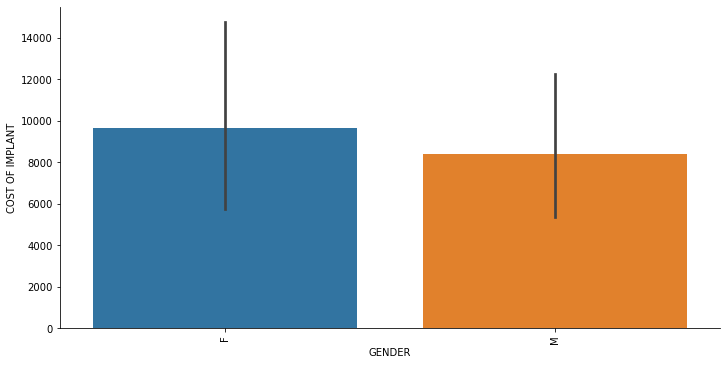

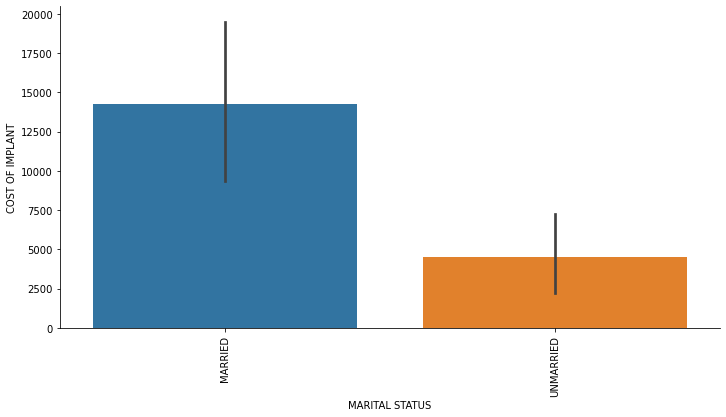

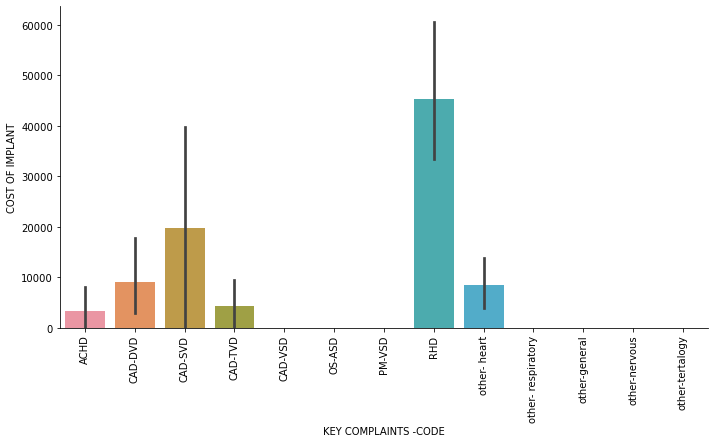

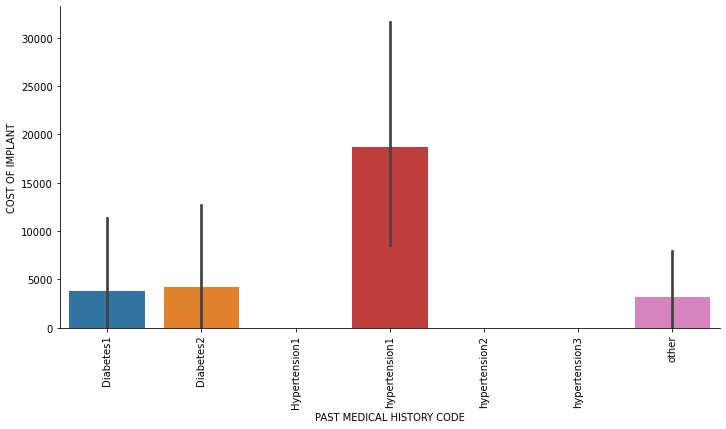

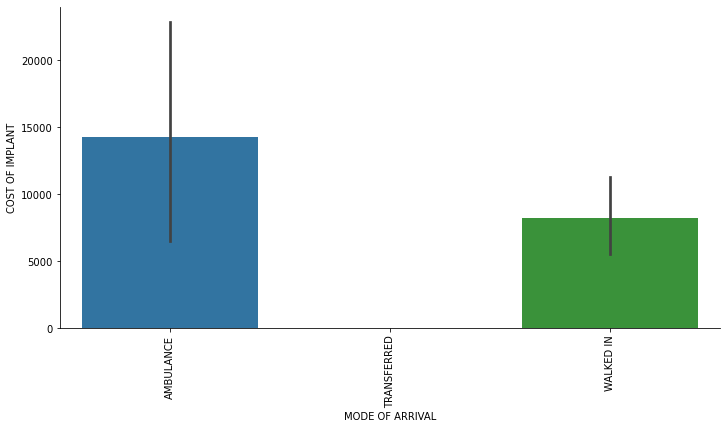

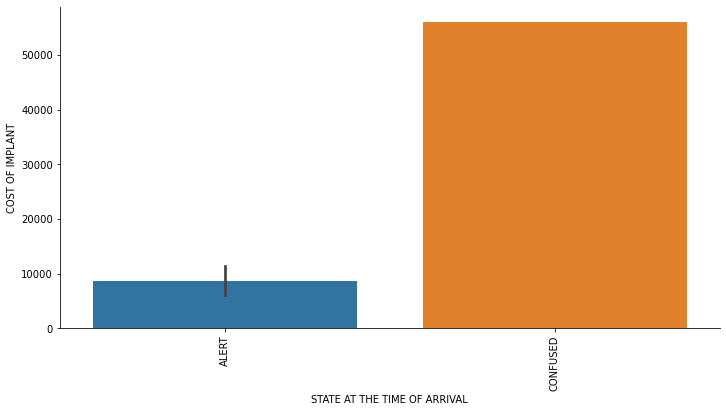

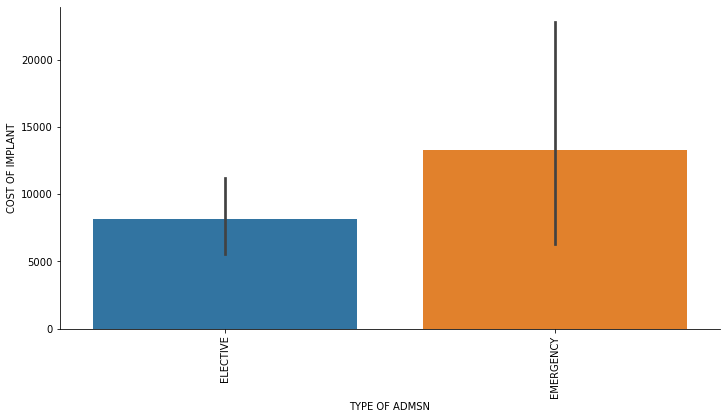

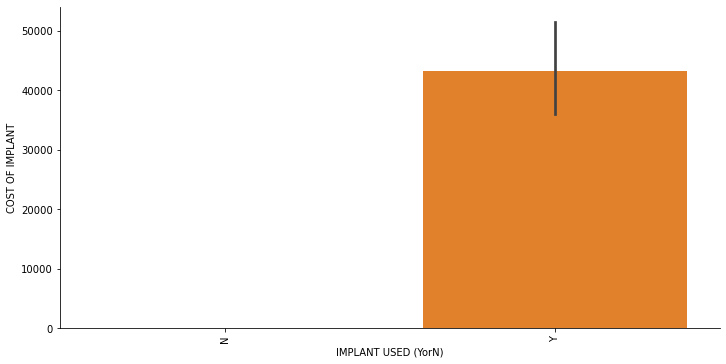

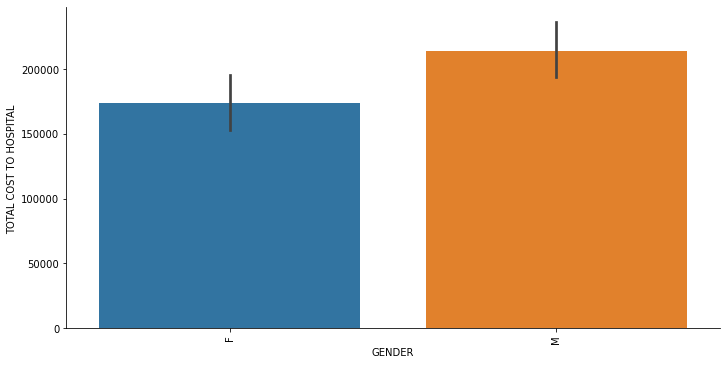

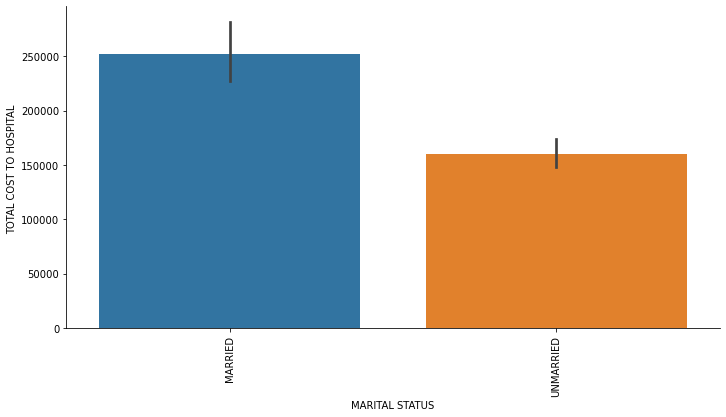

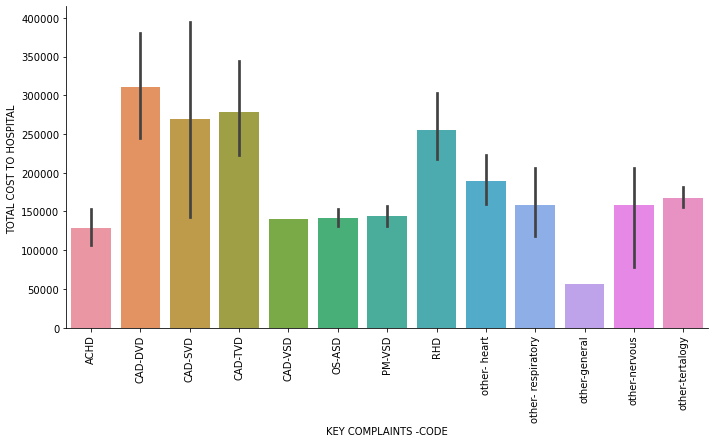

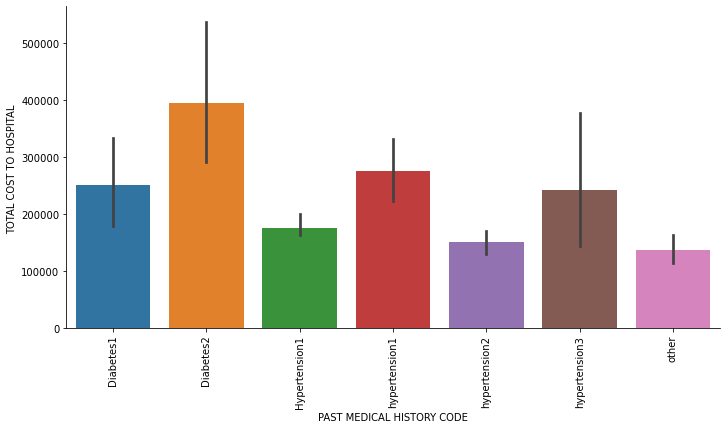

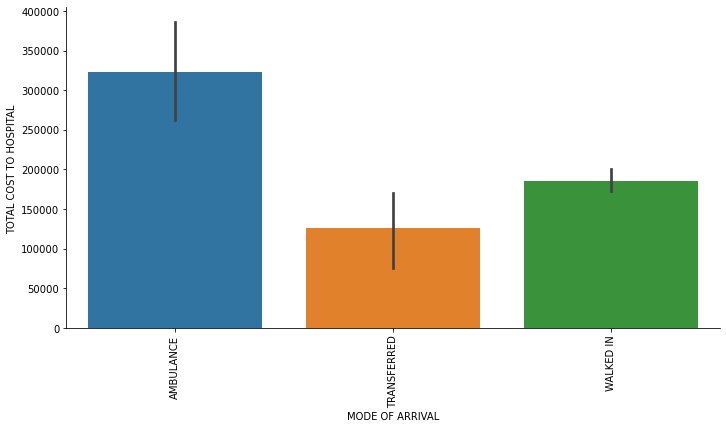

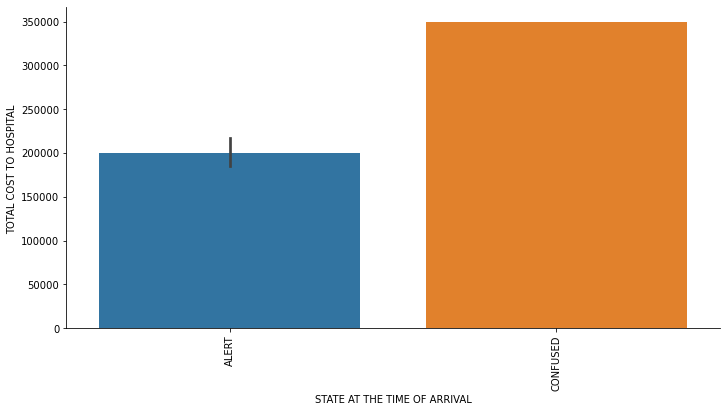

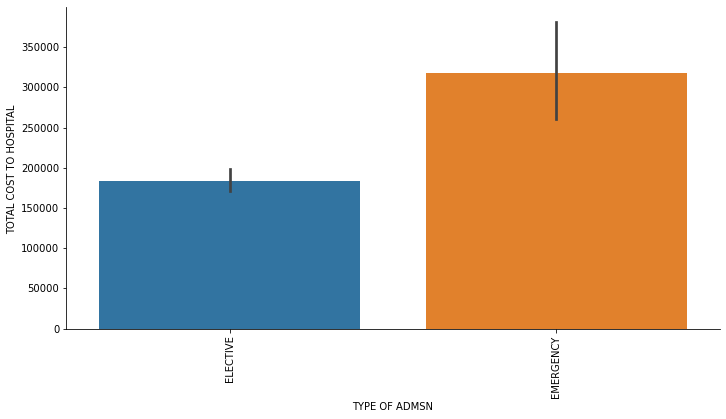

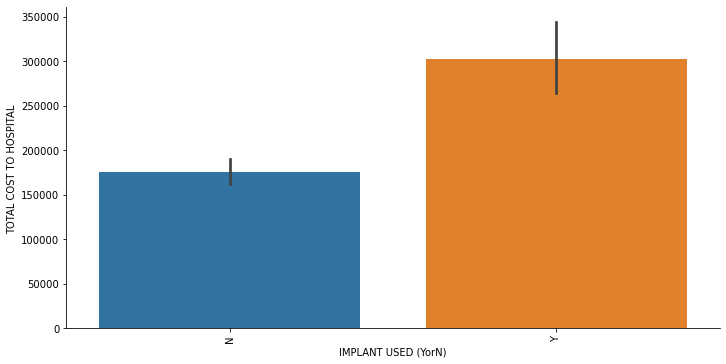

In [27]:
numeric_eda(df_reset)

In [28]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 247
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   AGE                           240 non-null    float64 
 1   GENDER                        240 non-null    category
 2   MARITAL STATUS                240 non-null    category
 3   KEY COMPLAINTS -CODE          210 non-null    category
 4   BODY WEIGHT                   240 non-null    float64 
 5   BODY HEIGHT                   240 non-null    int64   
 6   HR PULSE                      240 non-null    int64   
 7   BP -HIGH                      217 non-null    float64 
 8   BP-LOW                        217 non-null    float64 
 9   RR                            240 non-null    int64   
 10  PAST MEDICAL HISTORY CODE     75 non-null     category
 11  HB                            238 non-null    float64 
 12  UREA                          227 non-null    floa

In [29]:
df_reset.isna().sum()

AGE                               0
GENDER                            0
MARITAL STATUS                    0
KEY COMPLAINTS -CODE             30
BODY WEIGHT                       0
BODY HEIGHT                       0
HR PULSE                          0
BP -HIGH                         23
BP-LOW                           23
RR                                0
PAST MEDICAL HISTORY CODE       165
HB                                2
UREA                             13
CREATININE                       29
MODE OF ARRIVAL                   0
STATE AT THE TIME OF ARRIVAL      0
TYPE OF ADMSN                     0
TOTAL LENGTH OF STAY              0
LENGTH OF STAY - ICU              0
LENGTH OF STAY- WARD              0
IMPLANT USED (YorN)               0
COST OF IMPLANT                   0
TOTAL COST TO HOSPITAL            0
dtype: int64

In [30]:
df_reset.shape

(240, 23)

In [31]:
165/240

0.6875

In [32]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,TOTAL COST TO HOSPITAL
SL.,,,,,,,,,,,,,,,
1,58.0,49.2,160,118,100.0,80.0,32,11.4,33.0,0.8,25,12,13,38000,660293.0
2,59.0,41.0,155,78,70.0,50.0,28,11.4,95.0,1.7,41,20,21,39690,809130.0
3,82.0,46.6,164,100,110.0,80.0,20,11.8,15.0,0.8,18,9,9,0,362231.0
4,46.0,80.0,173,122,110.0,80.0,24,11.8,74.0,1.5,14,13,1,89450,629990.0
5,60.0,58.0,175,72,180.0,100.0,18,10.0,48.0,1.9,24,12,12,0,444876.0


array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BODY WEIGHT'}>,
        <AxesSubplot:title={'center':'BODY HEIGHT'}>,
        <AxesSubplot:title={'center':'HR PULSE'}>],
       [<AxesSubplot:title={'center':'BP -HIGH'}>,
        <AxesSubplot:title={'center':'BP-LOW'}>,
        <AxesSubplot:title={'center':'RR'}>,
        <AxesSubplot:title={'center':'HB'}>],
       [<AxesSubplot:title={'center':'UREA'}>,
        <AxesSubplot:title={'center':'CREATININE'}>,
        <AxesSubplot:title={'center':'TOTAL LENGTH OF STAY'}>,
        <AxesSubplot:title={'center':'LENGTH OF STAY - ICU'}>],
       [<AxesSubplot:title={'center':'LENGTH OF STAY- WARD'}>,
        <AxesSubplot:title={'center':'COST OF IMPLANT'}>,
        <AxesSubplot:title={'center':'TOTAL COST TO HOSPITAL '}>,
        <AxesSubplot:>]], dtype=object)

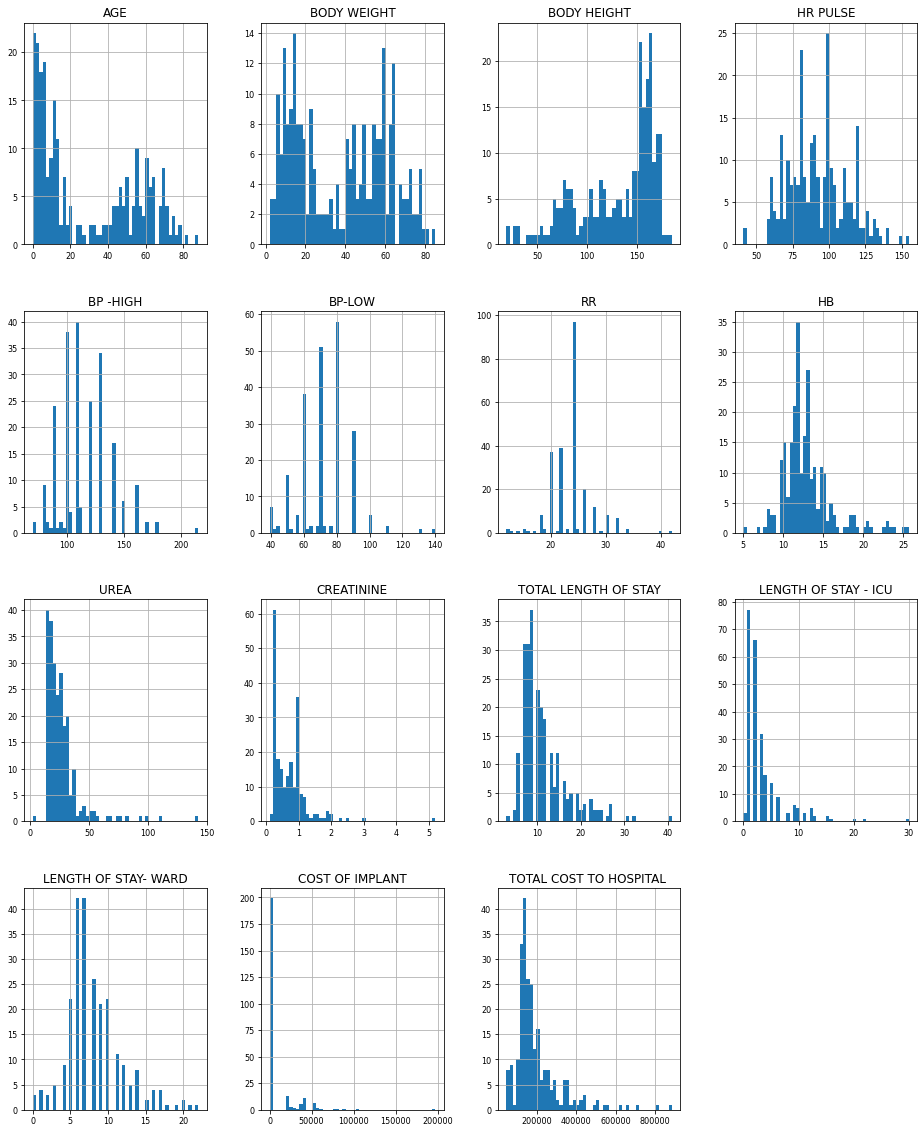

In [33]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [34]:
df_reset.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,...,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (YorN),COST OF IMPLANT,TOTAL COST TO HOSPITAL
0,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,32,...,0.8,AMBULANCE,ALERT,EMERGENCY,25,12,13,Y,38000,660293.0
1,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,28,...,1.7,AMBULANCE,ALERT,EMERGENCY,41,20,21,Y,39690,809130.0
2,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,20,...,0.8,WALKED IN,ALERT,ELECTIVE,18,9,9,N,0,362231.0
3,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,24,...,1.5,AMBULANCE,ALERT,EMERGENCY,14,13,1,Y,89450,629990.0
4,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,18,...,1.9,AMBULANCE,ALERT,EMERGENCY,24,12,12,N,0,444876.0


In [35]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 247
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   AGE                           240 non-null    float64 
 1   GENDER                        240 non-null    category
 2   MARITAL STATUS                240 non-null    category
 3   KEY COMPLAINTS -CODE          210 non-null    category
 4   BODY WEIGHT                   240 non-null    float64 
 5   BODY HEIGHT                   240 non-null    int64   
 6   HR PULSE                      240 non-null    int64   
 7   BP -HIGH                      217 non-null    float64 
 8   BP-LOW                        217 non-null    float64 
 9   RR                            240 non-null    int64   
 10  PAST MEDICAL HISTORY CODE     75 non-null     category
 11  HB                            238 non-null    float64 
 12  UREA                          227 non-null    floa

In [39]:
df_reset.isna().sum()

AGE                               0
GENDER                            0
MARITAL STATUS                    0
KEY COMPLAINTS -CODE             30
BODY WEIGHT                       0
BODY HEIGHT                       0
HR PULSE                          0
BP -HIGH                         23
BP-LOW                           23
RR                                0
PAST MEDICAL HISTORY CODE       165
HB                                2
UREA                             13
CREATININE                       29
MODE OF ARRIVAL                   0
STATE AT THE TIME OF ARRIVAL      0
TYPE OF ADMSN                     0
TOTAL LENGTH OF STAY              0
LENGTH OF STAY - ICU              0
LENGTH OF STAY- WARD              0
IMPLANT USED (YorN)               0
COST OF IMPLANT                   0
TOTAL COST TO HOSPITAL            0
dtype: int64

In [41]:
df_reset["KEY COMPLAINTS -CODE"].nunique()

13

In [42]:
df_reset["KEY COMPLAINTS -CODE"].unique()

['other- heart', 'CAD-DVD', 'CAD-TVD', 'RHD', NaN, ..., 'ACHD', 'OS-ASD', 'PM-VSD', 'CAD-VSD', 'other-general']
Length: 14
Categories (13, object): ['other- heart', 'CAD-DVD', 'CAD-TVD', 'RHD', ..., 'OS-ASD', 'PM-VSD', 'CAD-VSD', 'other-general']

In [45]:
df_reset["KEY COMPLAINTS -CODE"].mode()

0    other- heart
Name: KEY COMPLAINTS -CODE, dtype: category
Categories (13, object): ['ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD', ..., 'other- respiratory', 'other-general', 'other-nervous', 'other-tertalogy']

In [47]:
df_reset["KEY COMPLAINTS -CODE"] = df_reset["KEY COMPLAINTS -CODE"].fillna(df_reset["KEY COMPLAINTS -CODE"].mode()[0])

In [48]:
df_reset["KEY COMPLAINTS -CODE"].isna().sum()

0

In [50]:
df_reset["BP -HIGH"].unique()

array([100.,  70., 110., 180., 215., 160., 130., 140., 120., 150.,  90.,
        91.,  nan,  88.,  87., 103., 113.,  95.,  80.,  89., 102., 112.,
        96.,  84.,  98.,  99., 109., 101., 121., 170.])

In [51]:
df_reset["BP -HIGH"].nunique()

29

In [53]:
df_reset["BP -HIGH"].mean(),df_reset["BP -HIGH"].median(), df_reset["BP -HIGH"].mode()

(115.27188940092167,
 110.0,
 0    110.0
 dtype: float64)

In [ ]:
data['price'] = data['price'].fillna(data['price'].median())

In [58]:
df_reset["BP -HIGH"] = df_reset["BP -HIGH"].fillna(df_reset["BP -HIGH"].median())

In [59]:
df_reset["BP -HIGH"].isna().sum()

0

In [60]:
df_reset["BP-LOW"] = df_reset["BP-LOW"].fillna(df_reset["BP-LOW"].median())

In [61]:
df_reset["BP-LOW"].isna().sum()

0

In [63]:
df_reset["PAST MEDICAL HISTORY CODE"].unique()

[NaN, 'Diabetes2', 'hypertension1', 'hypertension3', 'hypertension2', 'Diabetes1', 'Hypertension1', 'other']
Categories (7, object): ['Diabetes2', 'hypertension1', 'hypertension3', 'hypertension2', 'Diabetes1', 'Hypertension1', 'other']

In [64]:
df_reset["PAST MEDICAL HISTORY CODE"].nunique()

7

In [67]:
df_reset["PAST MEDICAL HISTORY CODE"].mode()

0    hypertension1
Name: PAST MEDICAL HISTORY CODE, dtype: category
Categories (7, object): ['Diabetes1', 'Diabetes2', 'Hypertension1', 'hypertension1', 'hypertension2', 'hypertension3', 'other']

In [68]:
df_reset["PAST MEDICAL HISTORY CODE"] = df_reset["PAST MEDICAL HISTORY CODE"].fillna(df_reset["PAST MEDICAL HISTORY CODE"].mode()[0])

In [69]:
df_reset["PAST MEDICAL HISTORY CODE"].isna().sum()

0

In [73]:
df_reset["UREA"].unique()

array([ 33. ,  95. ,  15. ,  74. ,  48. ,  29. ,  31. ,  37. ,  32. ,
        30. ,   2. ,  21. ,  25. ,  43. ,  16. ,  36. ,  52. ,   nan,
        76. ,  35. ,  18. ,  20. ,  28. ,  66. ,  24. ,  82. ,  17. ,
        27. ,  26. ,  22. ,  50. ,  42. ,  19. ,  67. , 143. ,  38. ,
        99. ,  53. ,  14. ,  23. ,  56. ,  47. ,  34. ,  46. ,  40. ,
        45. , 111. ,  18.7])

In [74]:
df_reset["UREA"] = df_reset["UREA"].fillna(df_reset["UREA"].median())

In [75]:
df_reset["UREA"].isna().sum()

0

In [76]:
df_reset['CREATININE'].unique()

array([0.8, 1.7, 1.5, 1.9, 1. , 1.6, 1.2, 0.4, 0.9, 0.7, 0.6, 0.5, 1.1,
       1.8, 1.4, nan, 2.3, 2. , 5.2, 0.3, 3. , 2.5, 1.3, 0.2, 0.1])

In [77]:
df_reset['CREATININE'].nunique()

24

In [78]:
df_reset['CREATININE'] = df_reset['CREATININE'].fillna(df_reset['CREATININE'].median())

In [79]:
df_reset['CREATININE'].isna().sum()

0

In [81]:
df_reset['HB'].unique()

array([11.4 , 11.8 , 10.  , 14.5 , 10.1 ,  9.6 , 14.  , 13.  , 12.7 ,
       13.2 , 12.5 , 12.3 , 14.7 , 13.6 ,  9.7 , 14.8 , 10.3 ,  9.9 ,
       14.6 ,  9.  , 12.2 , 15.  , 16.2 , 13.49, 11.7 , 10.4 , 12.  ,
       16.  ,  8.  , 11.  , 14.1 ,  8.4 ,  9.8 , 16.6 , 11.3 , 12.6 ,
       21.  , 12.9 , 15.2 , 13.1 , 11.9 , 25.  , 16.4 , 20.7 , 10.8 ,
       11.2 , 16.1 , 15.4 , 11.5 , 13.3 ,  5.  , 12.4 , 22.8 , 18.5 ,
       11.47,   nan,  8.9 , 12.8 , 17.8 , 19.4 , 20.1 ,  7.7 , 18.6 ,
       10.5 , 25.7 , 15.9 , 11.1 , 18.9 , 18.8 , 17.9 , 23.2 , 14.9 ,
       15.3 , 13.5 , 22.9 ,  7.9 , 11.6 , 20.4 , 13.8 , 12.1 , 18.7 ,
       14.4 , 23.3 ,  7.  , 10.7 ,  8.7 , 13.4 , 23.8 ,  8.1 , 15.1 ,
       13.7 ,  8.5 , 10.6 ])

In [82]:
df_reset['HB'].nunique()

92

In [83]:
df_reset['HB'].mode()

0    12.0
dtype: float64

In [84]:
df_reset['HB'] = df_reset['HB'].fillna(df_reset['HB'].median())

In [85]:
df_reset.isna().sum()

AGE                             0
GENDER                          0
MARITAL STATUS                  0
KEY COMPLAINTS -CODE            0
BODY WEIGHT                     0
BODY HEIGHT                     0
HR PULSE                        0
BP -HIGH                        0
BP-LOW                          0
RR                              0
PAST MEDICAL HISTORY CODE       0
HB                              0
UREA                            0
CREATININE                      0
MODE OF ARRIVAL                 0
STATE AT THE TIME OF ARRIVAL    0
TYPE OF ADMSN                   0
TOTAL LENGTH OF STAY            0
LENGTH OF STAY - ICU            0
LENGTH OF STAY- WARD            0
IMPLANT USED (YorN)             0
COST OF IMPLANT                 0
TOTAL COST TO HOSPITAL          0
dtype: int64

In [86]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 247
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   AGE                           240 non-null    float64 
 1   GENDER                        240 non-null    category
 2   MARITAL STATUS                240 non-null    category
 3   KEY COMPLAINTS -CODE          240 non-null    category
 4   BODY WEIGHT                   240 non-null    float64 
 5   BODY HEIGHT                   240 non-null    int64   
 6   HR PULSE                      240 non-null    int64   
 7   BP -HIGH                      240 non-null    float64 
 8   BP-LOW                        240 non-null    float64 
 9   RR                            240 non-null    int64   
 10  PAST MEDICAL HISTORY CODE     240 non-null    category
 11  HB                            240 non-null    float64 
 12  UREA                          240 non-null    floa

In [87]:
df_reset.describe()

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,TOTAL COST TO HOSPITAL
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,29.421665,37.796333,130.245833,92.270833,114.766667,71.750000,23.47500,12.928583,26.602917,0.725000,11.745833,3.545833,8.216667,8829.008333,201195.725292
std,26.109825,23.264139,39.705532,20.433728,21.804661,14.729216,3.85395,3.107076,15.775630,0.520179,5.427150,3.895870,3.794255,21821.329874,123836.469681
min,0.032877,2.020000,19.000000,41.000000,70.000000,39.000000,12.00000,5.000000,2.000000,0.100000,3.000000,0.000000,0.000000,0.000000,46093.000000
25%,6.000000,15.000000,99.750000,78.000000,100.000000,60.000000,22.00000,11.375000,18.000000,0.300000,8.000000,1.000000,6.000000,0.000000,132894.000000
50%,16.000000,41.000000,149.000000,90.000000,110.000000,70.000000,24.00000,12.400000,23.000000,0.600000,10.000000,2.000000,7.000000,0.000000,163624.000000
75%,55.000000,59.000000,160.000000,104.000000,130.000000,80.000000,24.00000,14.000000,29.000000,1.000000,14.000000,4.000000,10.000000,0.000000,230135.750000
max,88.000000,85.000000,185.000000,155.000000,215.000000,140.000000,42.00000,25.700000,143.000000,5.200000,41.000000,30.000000,22.000000,196848.000000,887350.000000


In [88]:
df_category_columns = df_reset.select_dtypes(exclude=np.number).columns

In [107]:
df_num = df_reset.select_dtypes(include = np.number).columns

In [108]:
df_num

Index(['AGE', 'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW',
       'RR', 'HB', 'UREA', 'CREATININE', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'COST OF IMPLANT',
       'TOTAL COST TO HOSPITAL '],
      dtype='object')

In [109]:
df_numcols = df_reset[df_num]

In [111]:
df_numcols.isna().sum()

AGE                        0
BODY WEIGHT                0
BODY HEIGHT                0
HR PULSE                   0
BP -HIGH                   0
BP-LOW                     0
RR                         0
HB                         0
UREA                       0
CREATININE                 0
TOTAL LENGTH OF STAY       0
LENGTH OF STAY - ICU       0
LENGTH OF STAY- WARD       0
COST OF IMPLANT            0
TOTAL COST TO HOSPITAL     0
dtype: int64

In [89]:
df_category_columns

Index(['GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'PAST MEDICAL HISTORY CODE', 'MODE OF ARRIVAL',
       'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN', 'IMPLANT USED (YorN)'],
      dtype='object')

In [93]:
data_to_encode = df_reset[df_category_columns]

In [94]:
data_to_encode

,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,PAST MEDICAL HISTORY CODE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,IMPLANT USED (YorN)
0,M,MARRIED,other- heart,hypertension1,AMBULANCE,ALERT,EMERGENCY,Y
1,M,MARRIED,CAD-DVD,hypertension1,AMBULANCE,ALERT,EMERGENCY,Y
2,M,MARRIED,CAD-TVD,Diabetes2,WALKED IN,ALERT,ELECTIVE,N
3,M,MARRIED,CAD-DVD,hypertension1,AMBULANCE,ALERT,EMERGENCY,Y
4,M,MARRIED,CAD-DVD,Diabetes2,AMBULANCE,ALERT,EMERGENCY,N
...,...,...,...,...,...,...,...,...
243,M,MARRIED,other- heart,hypertension1,WALKED IN,ALERT,ELECTIVE,Y
244,M,MARRIED,CAD-TVD,other,WALKED IN,ALERT,ELECTIVE,Y
245,M,MARRIED,CAD-TVD,hypertension1,WALKED IN,ALERT,ELECTIVE,N
246,M,MARRIED,other- heart,hypertension1,AMBULANCE,ALERT,EMERGENCY,N


In [104]:
data_encoded = pd.get_dummies(data_to_encode, drop_first = True)
data_encoded.shape

(240, 25)

In [112]:
final_df = pd.concat([df_numcols, data_encoded], axis = 1)

In [113]:
final_df

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,TOTAL COST TO HOSPITAL,GENDER_M,MARITAL STATUS_UNMARRIED,KEY COMPLAINTS -CODE_CAD-DVD,KEY COMPLAINTS -CODE_CAD-SVD,KEY COMPLAINTS -CODE_CAD-TVD,KEY COMPLAINTS -CODE_CAD-VSD,KEY COMPLAINTS -CODE_OS-ASD,KEY COMPLAINTS -CODE_PM-VSD,KEY COMPLAINTS -CODE_RHD,KEY COMPLAINTS -CODE_other- heart,KEY COMPLAINTS -CODE_other- respiratory,KEY COMPLAINTS -CODE_other-general,KEY COMPLAINTS -CODE_other-nervous,KEY COMPLAINTS -CODE_other-tertalogy,PAST MEDICAL HISTORY CODE_Diabetes2,PAST MEDICAL HISTORY CODE_Hypertension1,PAST MEDICAL HISTORY CODE_hypertension1,PAST MEDICAL HISTORY CODE_hypertension2,PAST MEDICAL HISTORY CODE_hypertension3,PAST MEDICAL HISTORY CODE_other,MODE OF ARRIVAL_TRANSFERRED,MODE OF ARRIVAL_WALKED IN,STATE AT THE TIME OF ARRIVAL_CONFUSED,TYPE OF ADMSN_EMERGENCY,IMPLANT USED (YorN)_Y
0,58.0,49.2,160,118,100.0,80.0,32,11.4,33.0,0.8,25,12,13,38000,660293.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,59.0,41.0,155,78,70.0,50.0,28,11.4,95.0,1.7,41,20,21,39690,809130.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,82.0,46.6,164,100,110.0,80.0,20,11.8,15.0,0.8,18,9,9,0,362231.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,46.0,80.0,173,122,110.0,80.0,24,11.8,74.0,1.5,14,13,1,89450,629990.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
4,60.0,58.0,175,72,180.0,100.0,18,10.0,48.0,1.9,24,12,12,0,444876.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,51.0,69.0,176,62,130.0,90.0,24,13.2,26.0,1.1,10,3,7,35000,295155.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
244,58.0,57.0,159,58,100.0,70.0,24,10.6,15.0,0.8,11,2,9,26000,200321.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
245,44.0,58.0,159,68,150.0,90.0,24,15.2,23.0,0.9,13,5,8,0,191188.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
246,60.0,65.0,165,98,100.0,60.0,17,14.5,36.0,1.0,9,6,3,0,202807.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [114]:
pd.set_option ('display.max_columns', None)

In [116]:
final_df

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,TOTAL COST TO HOSPITAL,GENDER_M,MARITAL STATUS_UNMARRIED,KEY COMPLAINTS -CODE_CAD-DVD,KEY COMPLAINTS -CODE_CAD-SVD,KEY COMPLAINTS -CODE_CAD-TVD,KEY COMPLAINTS -CODE_CAD-VSD,KEY COMPLAINTS -CODE_OS-ASD,KEY COMPLAINTS -CODE_PM-VSD,KEY COMPLAINTS -CODE_RHD,KEY COMPLAINTS -CODE_other- heart,KEY COMPLAINTS -CODE_other- respiratory,KEY COMPLAINTS -CODE_other-general,KEY COMPLAINTS -CODE_other-nervous,KEY COMPLAINTS -CODE_other-tertalogy,PAST MEDICAL HISTORY CODE_Diabetes2,PAST MEDICAL HISTORY CODE_Hypertension1,PAST MEDICAL HISTORY CODE_hypertension1,PAST MEDICAL HISTORY CODE_hypertension2,PAST MEDICAL HISTORY CODE_hypertension3,PAST MEDICAL HISTORY CODE_other,MODE OF ARRIVAL_TRANSFERRED,MODE OF ARRIVAL_WALKED IN,STATE AT THE TIME OF ARRIVAL_CONFUSED,TYPE OF ADMSN_EMERGENCY,IMPLANT USED (YorN)_Y
0,58.0,49.2,160,118,100.0,80.0,32,11.4,33.0,0.8,25,12,13,38000,660293.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,59.0,41.0,155,78,70.0,50.0,28,11.4,95.0,1.7,41,20,21,39690,809130.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,82.0,46.6,164,100,110.0,80.0,20,11.8,15.0,0.8,18,9,9,0,362231.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,46.0,80.0,173,122,110.0,80.0,24,11.8,74.0,1.5,14,13,1,89450,629990.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
4,60.0,58.0,175,72,180.0,100.0,18,10.0,48.0,1.9,24,12,12,0,444876.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,51.0,69.0,176,62,130.0,90.0,24,13.2,26.0,1.1,10,3,7,35000,295155.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
244,58.0,57.0,159,58,100.0,70.0,24,10.6,15.0,0.8,11,2,9,26000,200321.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
245,44.0,58.0,159,68,150.0,90.0,24,15.2,23.0,0.9,13,5,8,0,191188.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
246,60.0,65.0,165,98,100.0,60.0,17,14.5,36.0,1.0,9,6,3,0,202807.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# Modelling 

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm #OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.preprocessing import StandardScaler

In [120]:
x = final_df.drop('TOTAL COST TO HOSPITAL ', axis =1)

In [121]:
y = final_df["TOTAL COST TO HOSPITAL "]

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [131]:
lm = LinearRegression()

lm.fit(x_train, y_train)

train_pred = lm.predict(x_train)
test_pred = lm.predict(x_test)

In [130]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

Train MAE:  24289.84756011044
Train MSE:  1074844999.7409763
Train RSME:  32784.828804509205
Train R2:  0.9278844232918231


In [132]:
print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Test MAE:  38697.8986870962
Test MSE:  5424247801.501281
Test RSME:  73649.49288013653
Test R2:  0.6685181913363037


In [133]:
x

,AGE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,RR,HB,UREA,CREATININE,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,COST OF IMPLANT,GENDER_M,MARITAL STATUS_UNMARRIED,KEY COMPLAINTS -CODE_CAD-DVD,KEY COMPLAINTS -CODE_CAD-SVD,KEY COMPLAINTS -CODE_CAD-TVD,KEY COMPLAINTS -CODE_CAD-VSD,KEY COMPLAINTS -CODE_OS-ASD,KEY COMPLAINTS -CODE_PM-VSD,KEY COMPLAINTS -CODE_RHD,KEY COMPLAINTS -CODE_other- heart,KEY COMPLAINTS -CODE_other- respiratory,KEY COMPLAINTS -CODE_other-general,KEY COMPLAINTS -CODE_other-nervous,KEY COMPLAINTS -CODE_other-tertalogy,PAST MEDICAL HISTORY CODE_Diabetes2,PAST MEDICAL HISTORY CODE_Hypertension1,PAST MEDICAL HISTORY CODE_hypertension1,PAST MEDICAL HISTORY CODE_hypertension2,PAST MEDICAL HISTORY CODE_hypertension3,PAST MEDICAL HISTORY CODE_other,MODE OF ARRIVAL_TRANSFERRED,MODE OF ARRIVAL_WALKED IN,STATE AT THE TIME OF ARRIVAL_CONFUSED,TYPE OF ADMSN_EMERGENCY,IMPLANT USED (YorN)_Y
0,58.0,49.2,160,118,100.0,80.0,32,11.4,33.0,0.8,25,12,13,38000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,59.0,41.0,155,78,70.0,50.0,28,11.4,95.0,1.7,41,20,21,39690,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,82.0,46.6,164,100,110.0,80.0,20,11.8,15.0,0.8,18,9,9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,46.0,80.0,173,122,110.0,80.0,24,11.8,74.0,1.5,14,13,1,89450,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
4,60.0,58.0,175,72,180.0,100.0,18,10.0,48.0,1.9,24,12,12,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,51.0,69.0,176,62,130.0,90.0,24,13.2,26.0,1.1,10,3,7,35000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
244,58.0,57.0,159,58,100.0,70.0,24,10.6,15.0,0.8,11,2,9,26000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
245,44.0,58.0,159,68,150.0,90.0,24,15.2,23.0,0.9,13,5,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
246,60.0,65.0,165,98,100.0,60.0,17,14.5,36.0,1.0,9,6,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [134]:
sc = StandardScaler()

In [142]:
x_scaled = sc.fit_transform(x)

In [143]:
x_scaled

array([[ 1.09683081,  0.49120662,  0.75093689, ..., -0.06468462,
         2.59652373,  1.97432499],
       [ 1.13521061,  0.13799616,  0.62474669, ..., -0.06468462,
         2.59652373,  1.97432499],
       [ 2.01794603,  0.37921306,  0.85188906, ..., -0.06468462,
        -0.38513031, -0.50650222],
       ...,
       [ 0.5595136 ,  0.87026173,  0.72569885, ..., -0.06468462,
        -0.38513031, -0.50650222],
       [ 1.17359041,  1.17178285,  0.8771271 , ..., -0.06468462,
         2.59652373, -0.50650222],
       [ 0.02219639,  1.43022952,  1.25569773, ..., -0.06468462,
        -0.38513031,  1.97432499]])

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.25, random_state=42)

In [145]:
lm = LinearRegression()

lm.fit(x_train, y_train)

train_pred = lm.predict(x_train)
test_pred = lm.predict(x_test)

In [146]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

Train MAE:  24289.847560106497
Train MSE:  1074844999.7409766
Train RSME:  32784.828804509205
Train R2:  0.9278844232918231


In [147]:
print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Test MAE:  38697.89868699682
Test MSE:  5424247801.484476
Test RSME:  73649.49288002244
Test R2:  0.6685181913373307


In [158]:
from sklearn.tree import DecisionTreeRegressor
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2, random_state=100)

In [168]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [161]:
print(dt.score(x_val,y_val))

0.42350459468183543


In [162]:
print(dt.score(x_train,y_train))

1.0


In [163]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
rf = RandomForestRegressor()

In [180]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [182]:
rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_val)

In [183]:
print(rf.score(x_val,y_val))

0.8109918933825766


In [184]:
print(rf.score(x_train,y_train))

0.9578294447548015


In [223]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, rf_train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, rf_train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, rf_train_pred)))

print('Train R2: ', metrics.r2_score(y_train, rf_train_pred))

Train MAE:  15644.831002083336
Train MSE:  681741097.1742138
Train RSME:  26110.172293077918
Train R2:  0.9578294447548015


In [225]:
print('Test MAE: ',metrics.mean_absolute_error(y_val, rf_test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_val, rf_test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_val, rf_test_pred)))

print('Test R2: ', metrics.r2_score(y_val, rf_test_pred))

Test MAE:  30177.802591666663
Test MSE:  2099033913.7566955
Test RSME:  45815.21487188176
Test R2:  0.8109918933825766


In [185]:
parameters = {"n_estimators":[5,10,50,100,250], "max_depth":[2,4,8,16,32,None]}

In [188]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rf,parameters,cv=10)
cv.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [186]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [189]:
display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 10}


0.518 + or -0.251 for the {'max_depth': 2, 'n_estimators': 5}
0.543 + or -0.226 for the {'max_depth': 2, 'n_estimators': 10}
0.547 + or -0.222 for the {'max_depth': 2, 'n_estimators': 50}
0.558 + or -0.225 for the {'max_depth': 2, 'n_estimators': 100}
0.547 + or -0.223 for the {'max_depth': 2, 'n_estimators': 250}
0.556 + or -0.224 for the {'max_depth': 4, 'n_estimators': 5}
0.665 + or -0.192 for the {'max_depth': 4, 'n_estimators': 10}
0.645 + or -0.201 for the {'max_depth': 4, 'n_estimators': 50}
0.613 + or -0.226 for the {'max_depth': 4, 'n_estimators': 100}
0.633 + or -0.212 for the {'max_depth': 4, 'n_estimators': 250}
0.609 + or -0.161 for the {'max_depth': 8, 'n_estimators': 5}
0.615 + or -0.329 for the {'max_depth': 8, 'n_estimators': 10}
0.629 + or -0.176 for the {'max_depth': 8, 'n_estimators': 50}
0.639 + or -0.193 for the {'max_depth': 8, 'n_estimators': 100}
0.636 + or -0.204 for the {'max_depth': 8, 'n_estimator

In [191]:
print(cv.score(x_train,y_train))

0.9411713065540318


In [192]:
print(cv.score(x_val,y_val))

0.6929996485942151


In [198]:
rf1 = RandomForestRegressor(max_depth= 32, n_estimators= 10)

In [200]:
rf1.fit(x_train,y_train)

RandomForestRegressor(max_depth=32, n_estimators=10)

In [204]:
print(rf1.score(x_val,y_val))

0.7972040188919747


In [203]:
print(rf1.score(x_train,y_train))

0.9421559695378533


In [208]:
from sklearn.ensemble import AdaBoostRegressor

In [209]:
ab_model = AdaBoostRegressor(base_estimator=rf, n_estimators=50)

In [210]:
ab_model.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor())

In [211]:
print(ab_model.score(x_val,y_val))

0.8178965894207157


In [213]:
print(ab_model.score(x_train,y_train))

0.9898132281160927


In [214]:
from xgboost import XGBRegressor

In [215]:
xgb = XGBRegressor()


In [216]:
xgb.fit(x_train,y_train)
print(xgb.score(x_val,y_val))

0.7649756152318657


In [217]:
print(xgb.score(x_train,y_train))

0.9999999852215014


In [220]:
from sklearn.ensemble import VotingRegressor

In [243]:
estimators = [("ada", ab_model), ("rf", rf), ("xgb", xgb)]

In [244]:
estimators

[('ada', AdaBoostRegressor(base_estimator=RandomForestRegressor())),
 ('rf', RandomForestRegressor()),
 ('xgb',
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))]

In [245]:
vc = VotingRegressor(estimators)
vc.fit(x_train,y_train)
vc.score(x_val,y_val)

0.8051524933151601

In [289]:
vc.score(x_train,y_train)

0.9920071568221931

In [246]:
from mlxtend.regressor import StackingRegressor

In [ ]:
sclf1 = StackingCVClassifier(classifiers= [clf1, clf2, clf3, clf4],meta_classifier=lr, random_state=42, use_probas=True)

In [248]:
lr = LinearRegression()

In [274]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [316]:
strm = StackingRegressor(regressors = [rf,lars], meta_regressor = lr)

In [317]:
strm.fit(x_train,y_train)

StackingRegressor(meta_regressor=LinearRegression(),
                  regressors=[RandomForestRegressor(), LassoLars()])

In [318]:
strm.score(x_val,y_val)

0.7613277752075629

In [319]:
strm.score(x_train,y_train)

0.9598349942729558

In [257]:
from sklearn.linear_model import LassoLars

In [258]:
lars = LassoLars()

In [286]:
lars.fit(x_train,y_train)

LassoLars()

In [295]:
lars.score(x_val,y_val)
lars_Train_pred = lars.predict(x_train)
lars_test_pred = lars.predict(x_val)

In [288]:
lars.score(x_train,y_train)

0.8706054349615743

In [296]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, lars_Train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, lars_Train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, lars_Train_pred)))

print('Train R2: ', metrics.r2_score(y_train, lars_Train_pred))

Train MAE:  28129.60376414974
Train MSE:  2091829055.2439518
Train RSME:  45736.51774287098
Train R2:  0.8706054349615743


In [298]:
print('Test MAE: ',metrics.mean_absolute_error(y_val, lars_test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_val, lars_test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_val, lars_test_pred)))

print('Test R2: ', metrics.r2_score(y_val, lars_test_pred))

Test MAE:  26656.734677212862
Test MSE:  1384188711.8359108
Test RSME:  37204.68669181224
Test R2:  0.8753603331939108
